In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('../data/train_cleaned.csv')
train.head()

,ID,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,3mo_delinquency,6mo_delinquency,12mo_delinquency,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,0,16,2,0.125000,0,0,0,Y,Y,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
1,5008805,0,15,2,0.133333,0,0,0,Y,Y,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
2,5008806,0,30,7,0.233333,0,0,1,Y,Y,...,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,1,5,2,0.400000,1,1,1,N,Y,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,0,5,0,0.000000,0,0,0,N,Y,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8


# Owns car
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<Br> / 3 months delinquency / 6months delinquency / 12 months delinquency

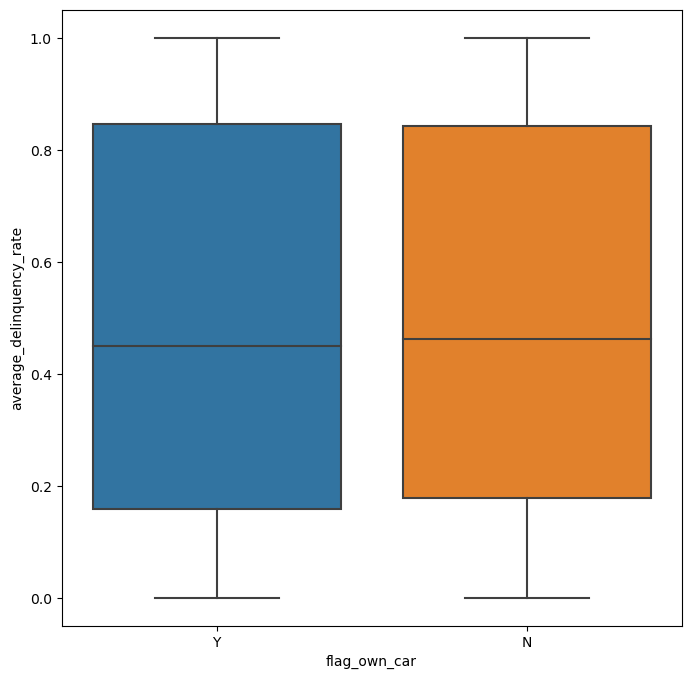

In [7]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='flag_own_car', y='average_delinquency_rate', data=train);
# plt.xticks(rotation = 90);

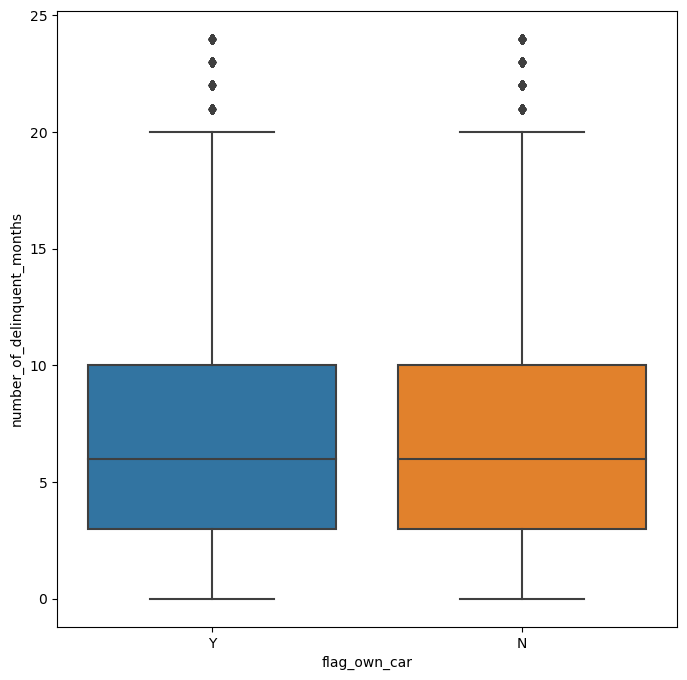

In [8]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='flag_own_car', y='number_of_delinquent_months', data=train[train['number_of_delinquent_months']<25]);
# plt.xticks(rotation = 90);

**I'm not sure if we can make this statement**

> The condition if a person has or does not have a car makes a difference more on the length of the credit than the number of delinquent months or the average delinquency rate

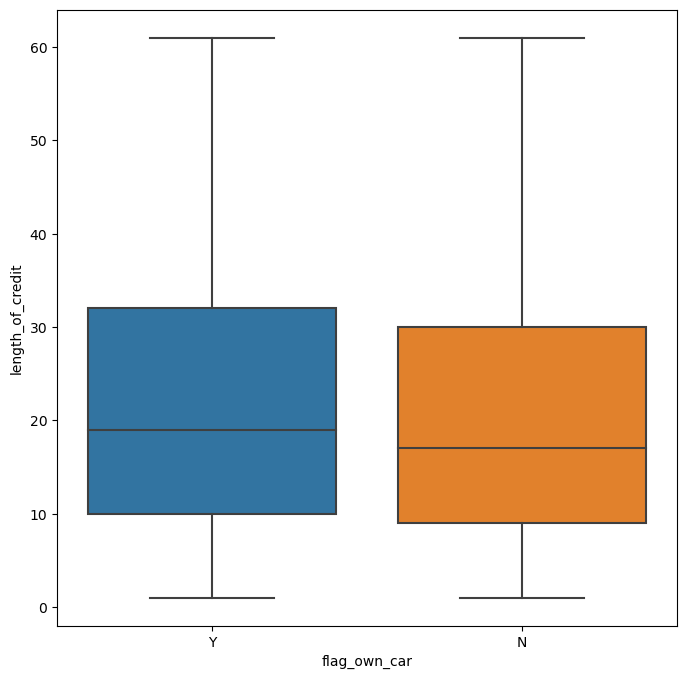

In [9]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='flag_own_car', y='length_of_credit', data=train);
# plt.xticks(rotation = 90);

In [129]:
train.groupby('flag_own_car')['12mo_delinquency'].value_counts(normalize=True)\
            .unstack(level = 1)

12mo_delinquency,0,1
flag_own_car,,
N,0.414254,0.585746
Y,0.436298,0.563702


In [125]:
pd.crosstab(train['flag_own_car'], train['12mo_delinquency'], normalize='index', margins=False)

# bool, {'all', 'index', 'columns'}

12mo_delinquency,0,1
flag_own_car,,
N,0.414254,0.585746
Y,0.436298,0.563702


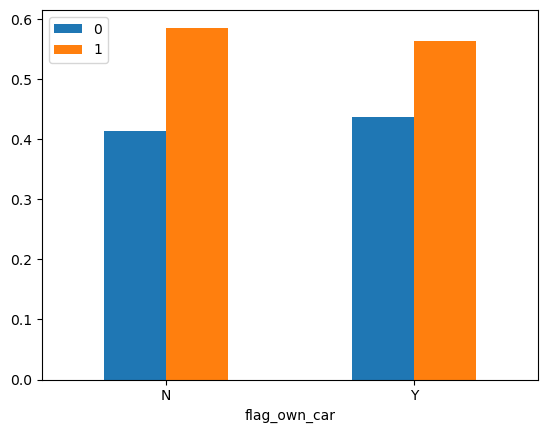

In [29]:
pd.crosstab(train['flag_own_car'], train['12mo_delinquency'], normalize='index')\
            .plot(kind = 'bar').legend(loc='upper left')
plt.xticks(rotation=0);


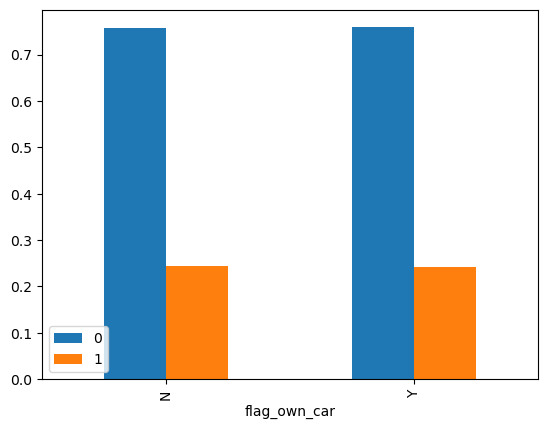

In [31]:
train.groupby('flag_own_car')['is_delinquent'].value_counts(normalize=True)\
        .unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

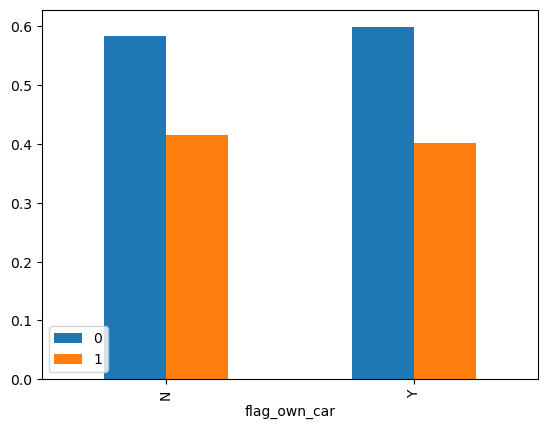

In [9]:
train.groupby('flag_own_car')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

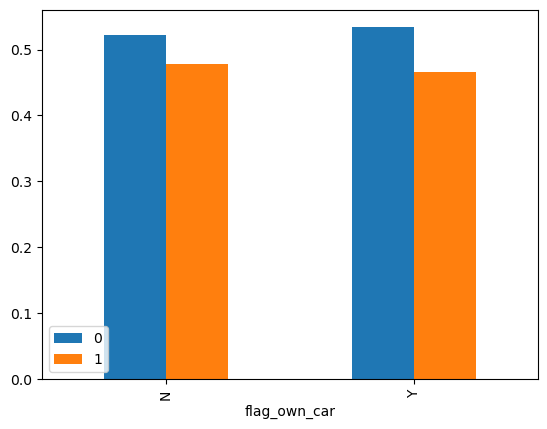

In [10]:
train.groupby('flag_own_car')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

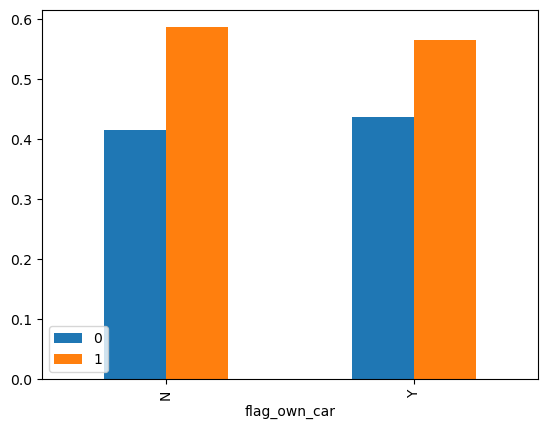

In [11]:
train.groupby('flag_own_car')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

# Owns realty
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

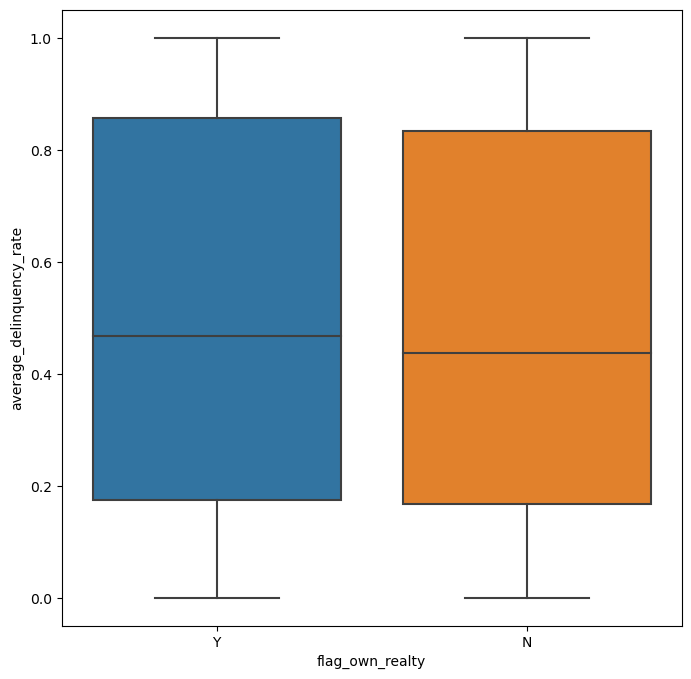

In [32]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='flag_own_realty', y='average_delinquency_rate', data=train)
plt.xticks(rotation = 0);

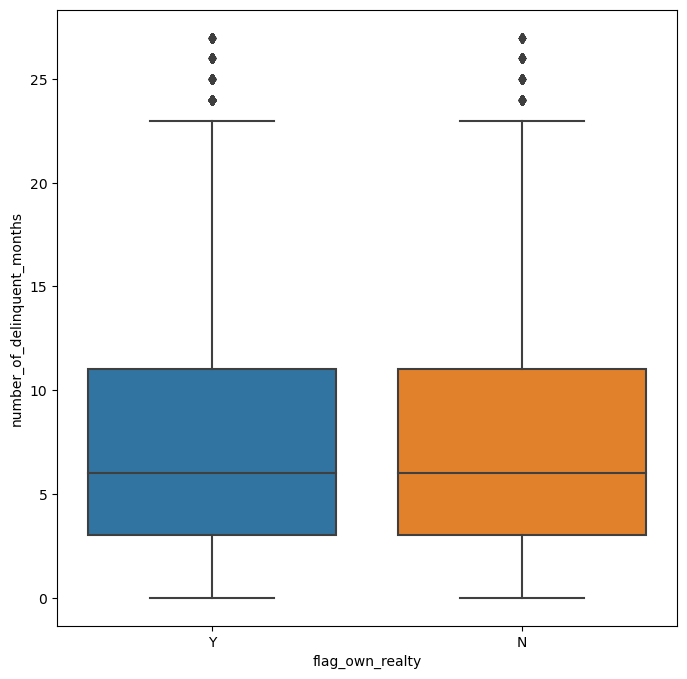

In [33]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='flag_own_realty', y='number_of_delinquent_months', data=train[train['number_of_delinquent_months']<28])
plt.xticks(rotation = 0);

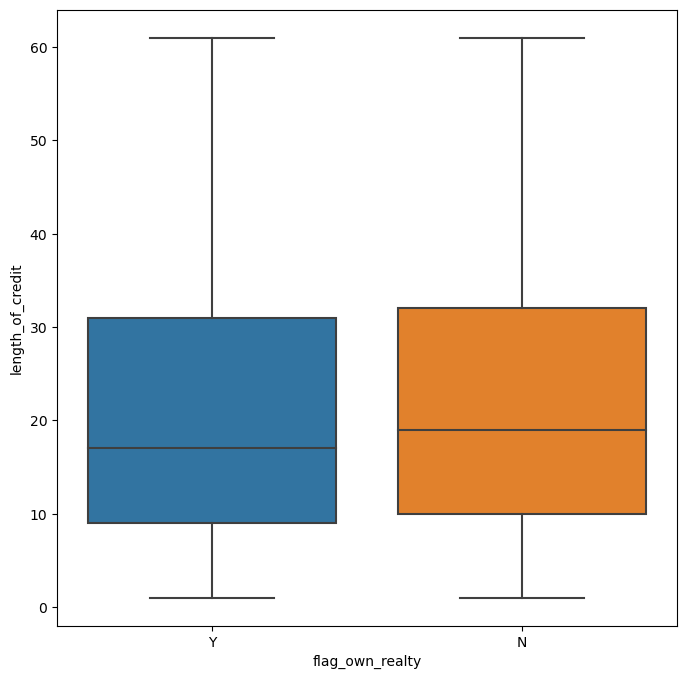

In [34]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='flag_own_realty', y='length_of_credit', data=train)
plt.xticks(rotation = 0);

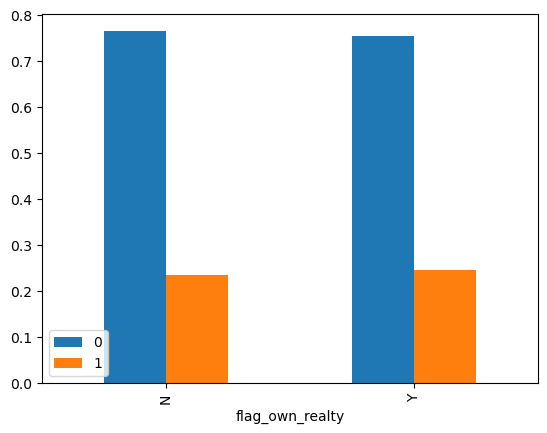

In [16]:
train.groupby('flag_own_realty')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


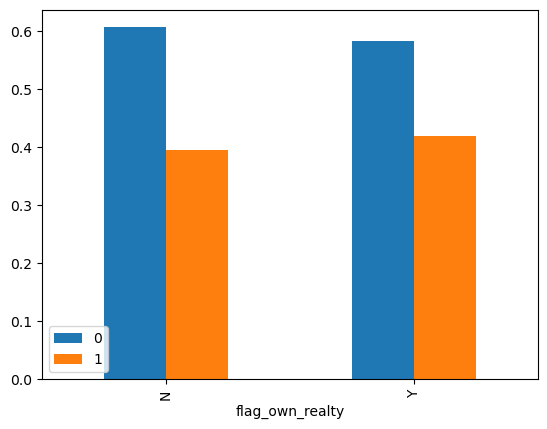

In [17]:
train.groupby('flag_own_realty')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


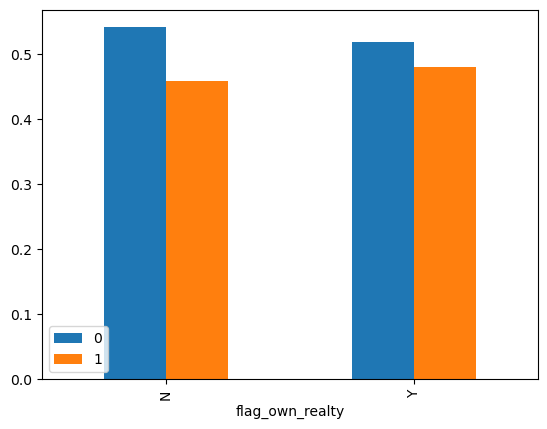

In [18]:
train.groupby('flag_own_realty')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


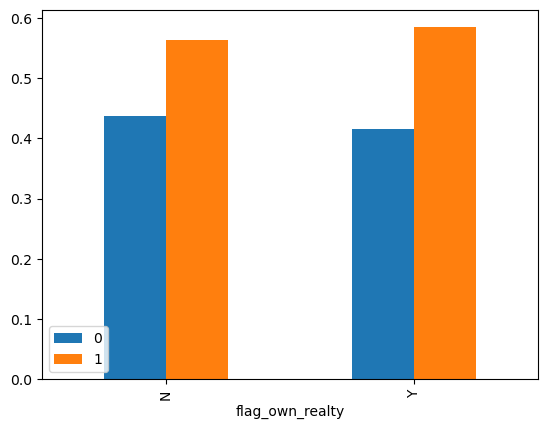

In [19]:
train.groupby('flag_own_realty')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


# Number of children
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

In [105]:
# remove 5 or more

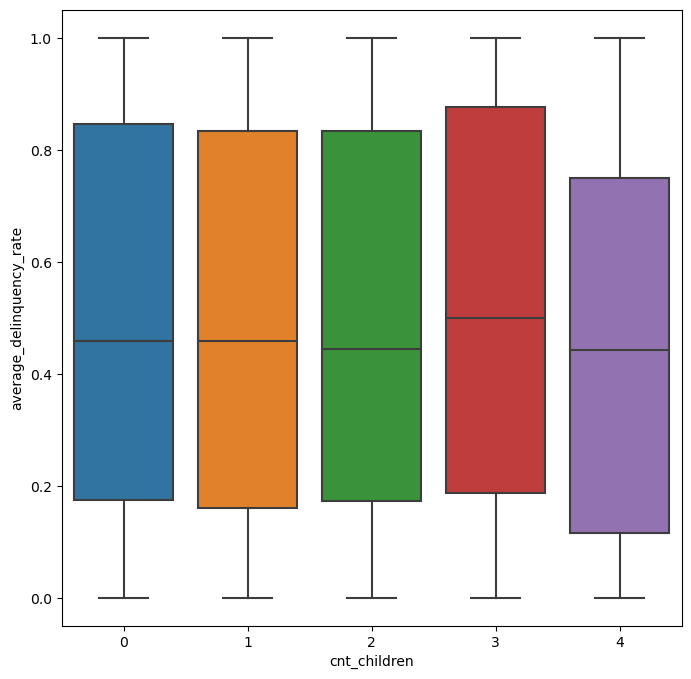

In [36]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='cnt_children', y='average_delinquency_rate', data=train[train['cnt_children']<5])
plt.xticks(rotation = 0);

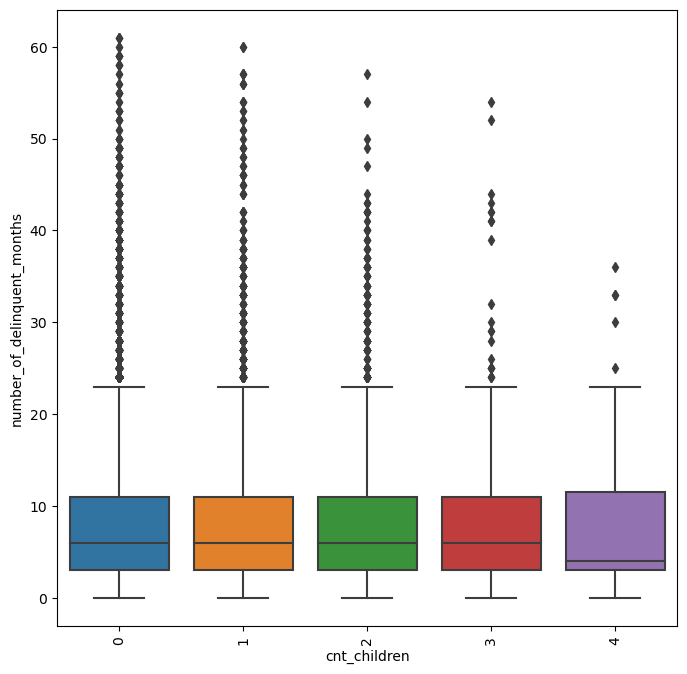

In [37]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='cnt_children', y='number_of_delinquent_months', data=train[train['cnt_children']<5])
plt.xticks(rotation = 90);

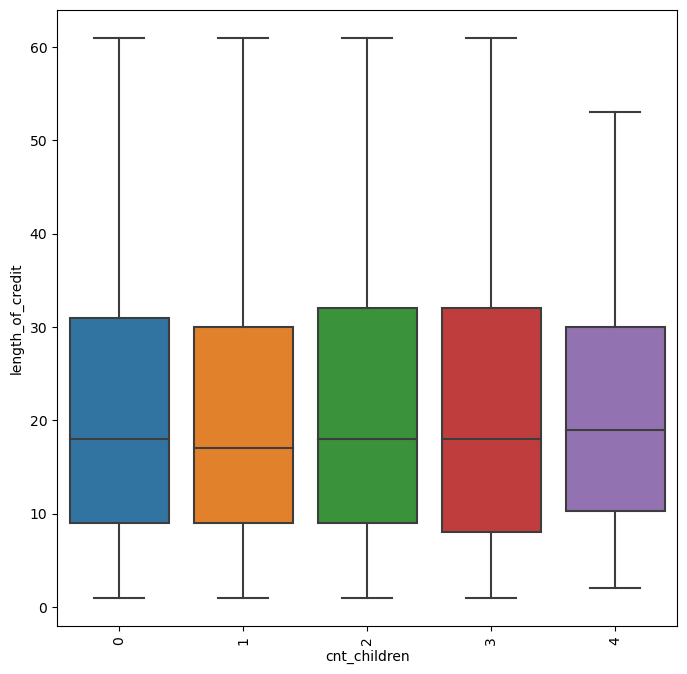

In [38]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='cnt_children', y='length_of_credit', data=train[train['cnt_children']<5])
plt.xticks(rotation = 90);

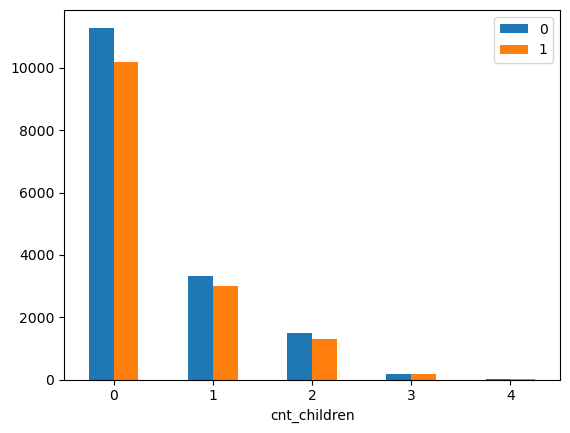

In [47]:
train[train['cnt_children']<5].groupby('cnt_children')['6mo_delinquency']\
        .value_counts().unstack(level = 1).plot(kind = 'bar').legend(loc='best')

plt.xticks(rotation=0);
plt.legend();

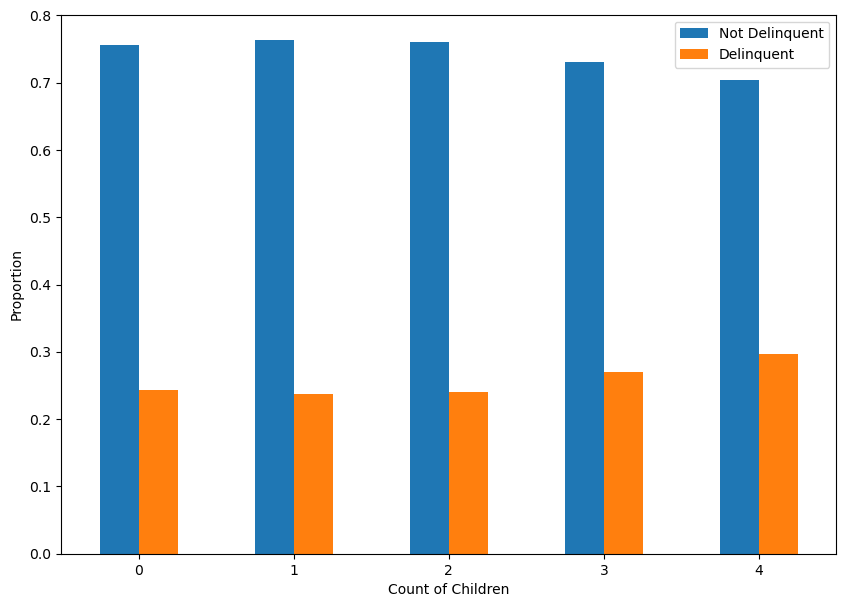

In [63]:
train[train['cnt_children']<5].groupby('cnt_children')['is_delinquent']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(10, 7))

labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best')
plt.xlabel('Count of Children')
plt.ylabel('Proportion')
plt.xticks(rotation=0);


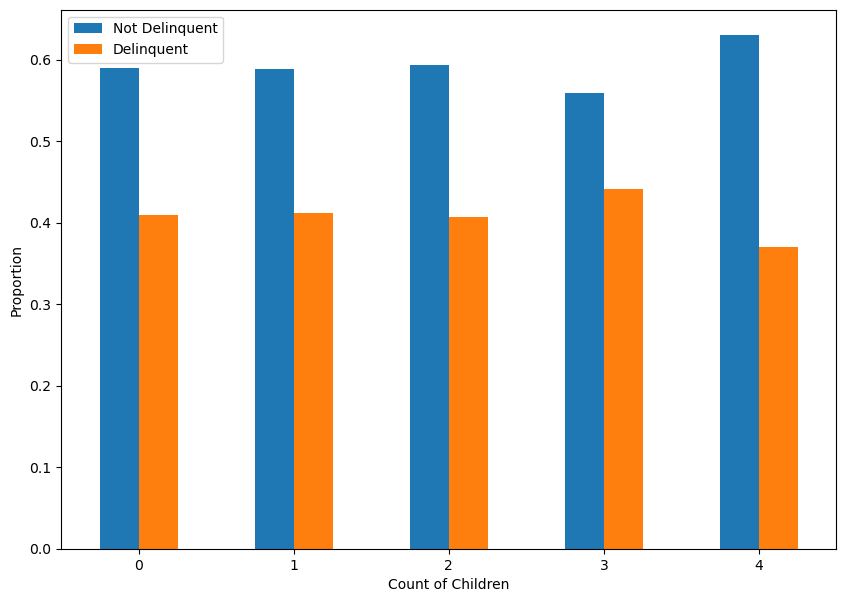

In [66]:
train[train['cnt_children']<5].groupby('cnt_children')['3mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(10, 7));
labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best')
plt.xlabel('Count of Children')
plt.ylabel('Proportion')
plt.xticks(rotation=0);

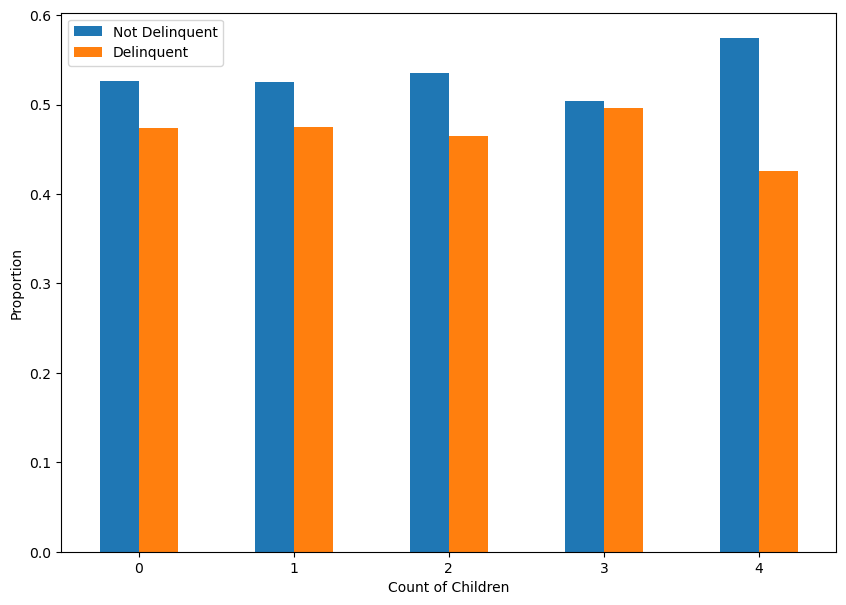

In [67]:
train[train['cnt_children']<5].groupby('cnt_children')['6mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(10, 7));
labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best')
plt.xlabel('Count of Children')
plt.ylabel('Proportion')
plt.xticks(rotation=0);

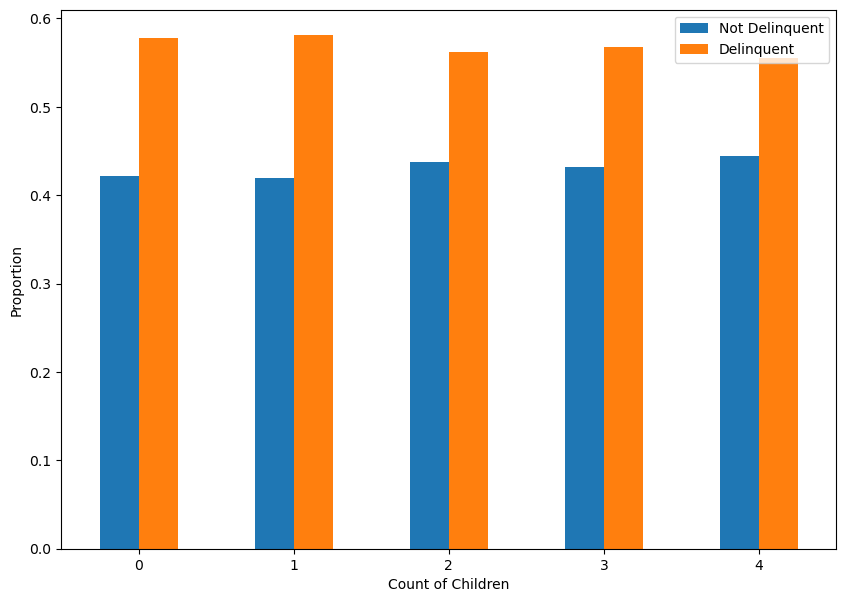

In [121]:
train[train['cnt_children']<5].groupby('cnt_children')['12mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(10, 7));

labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best')
plt.xlabel('Count of Children')
plt.ylabel('Proportion')
plt.xticks(rotation=0);

# Annual income
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

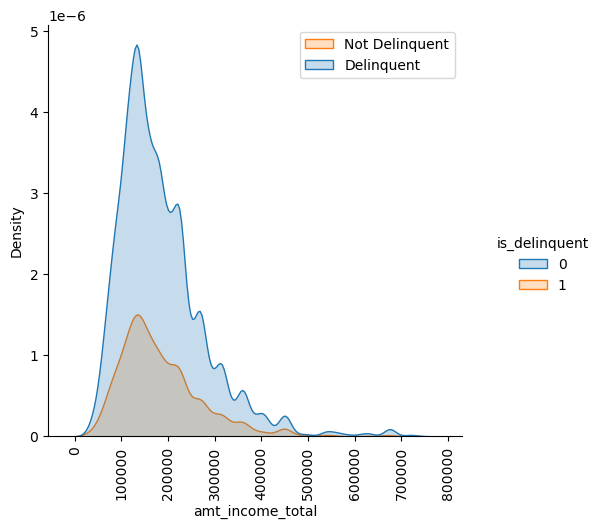

In [73]:
sns.displot(train[train['amt_income_total']<0.75e6], x='amt_income_total', hue="is_delinquent", kind="kde", fill=True)
plt.legend(labels, loc='best')

plt.xticks(rotation = 90);

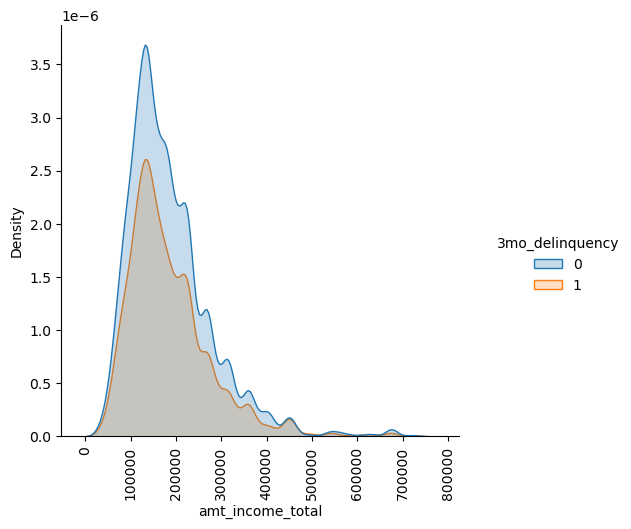

In [28]:
sns.displot(train[train['amt_income_total']<0.75e6], x='amt_income_total', hue='3mo_delinquency', kind="kde", fill=True)
plt.xticks(rotation = 90);

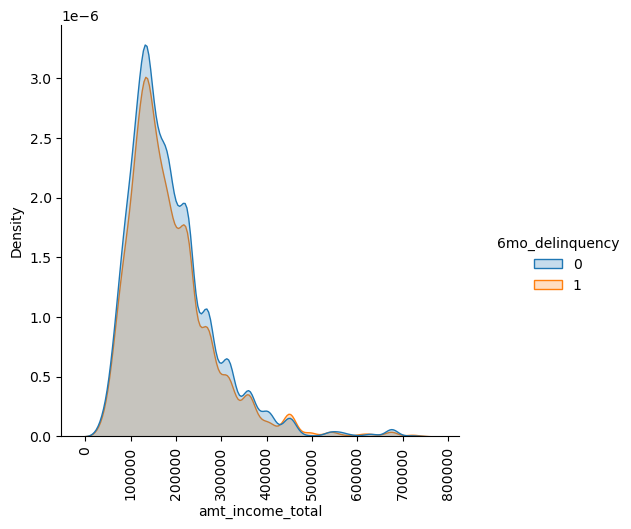

In [29]:
sns.displot(train[train['amt_income_total']<0.75e6], x='amt_income_total', hue='6mo_delinquency', kind="kde", fill=True)
plt.xticks(rotation = 90);

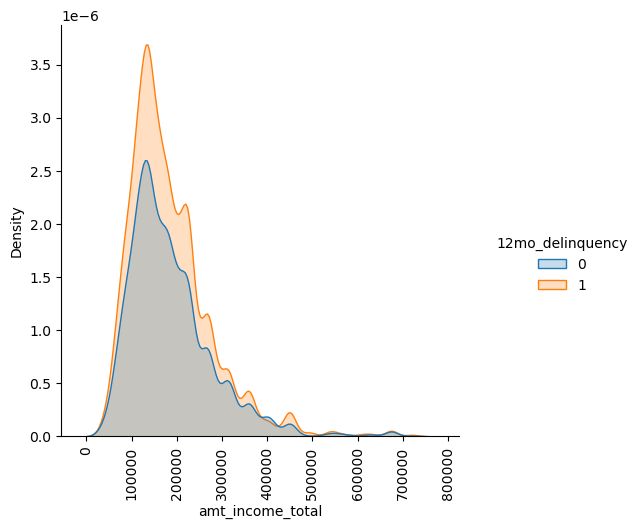

In [30]:
sns.displot(train[train['amt_income_total']<0.75e6], x='amt_income_total', hue='12mo_delinquency', kind="kde", fill=True)
plt.xticks(rotation = 90);

# Income type
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

In [88]:
train['name_income_type'].value_counts()

Working                 16044
Commercial associate     7217
Pensioner                5223
State servant            2568
Student                     8
Name: name_income_type, dtype: int64

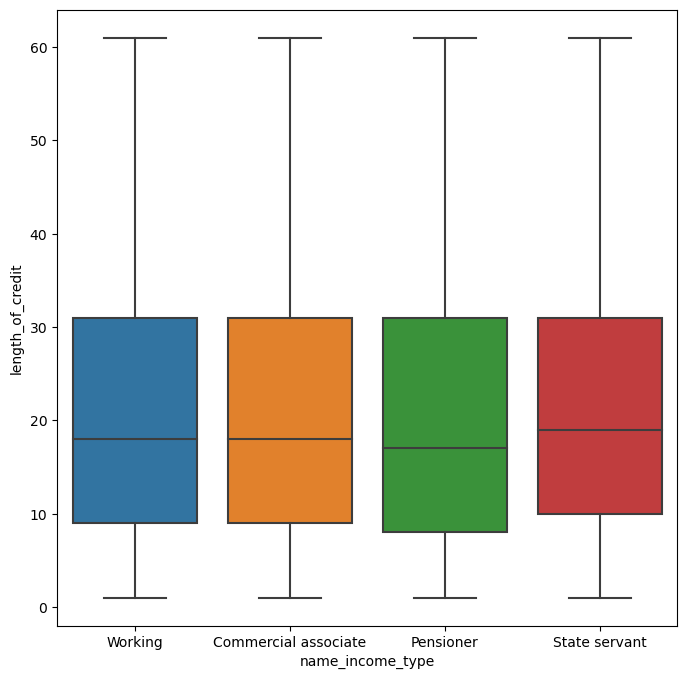

In [87]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_income_type', y='length_of_credit', data=train[train['name_income_type']!='Student'])
plt.xticks(rotation = 0);

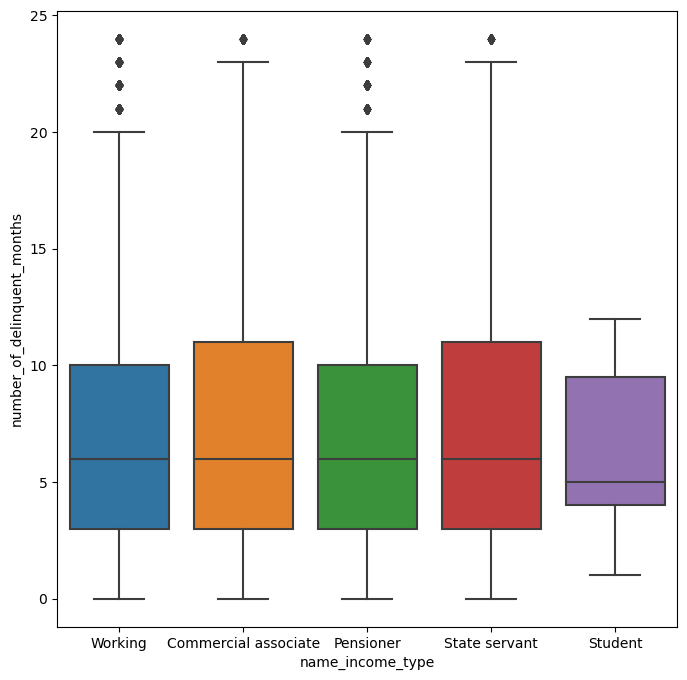

In [90]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_income_type', y='number_of_delinquent_months', data=train[train['number_of_delinquent_months']<25])
plt.xticks(rotation = 0);

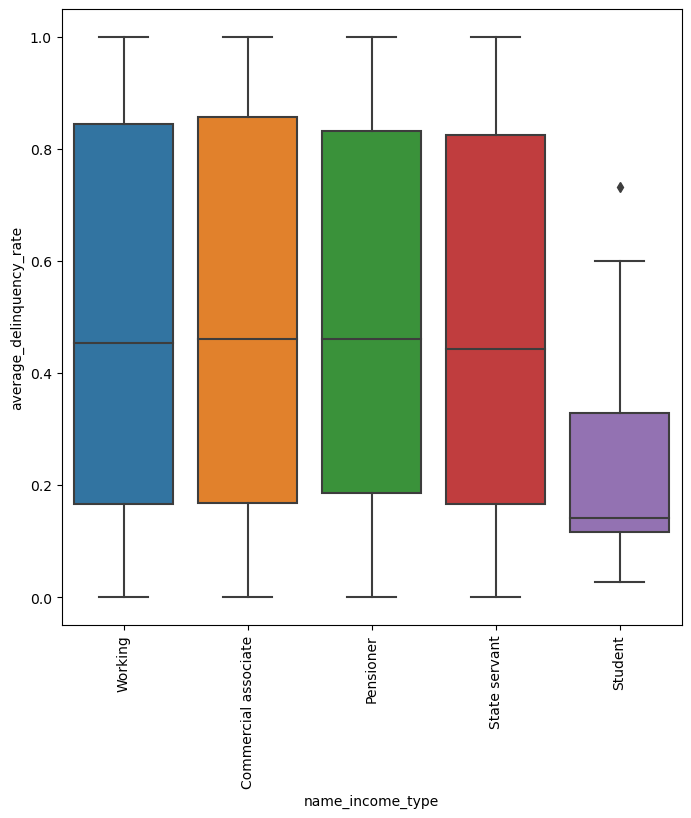

In [35]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_income_type', y='average_delinquency_rate', data=train)
plt.xticks(rotation = 90);

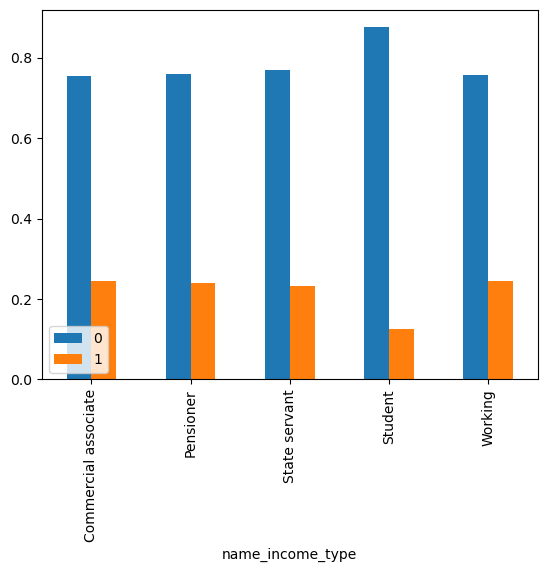

In [36]:
train.groupby('name_income_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


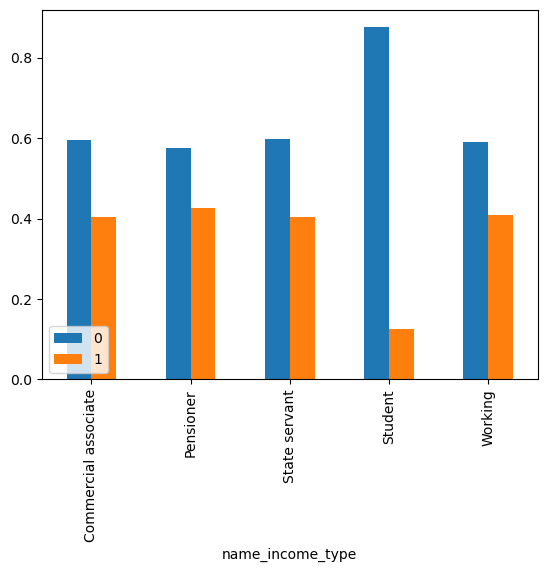

In [37]:
train.groupby('name_income_type')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


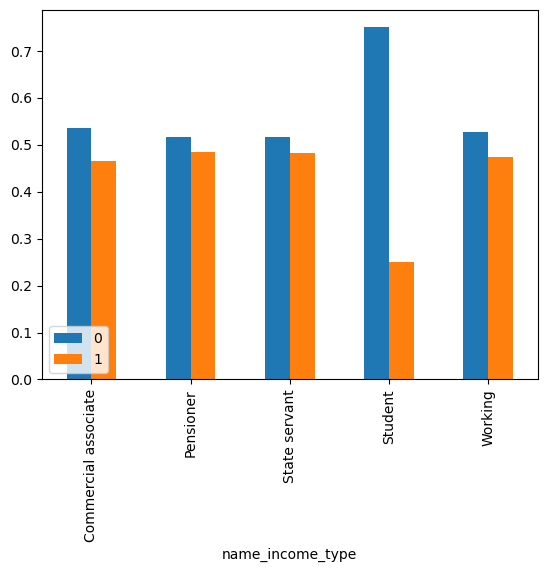

In [38]:
train.groupby('name_income_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


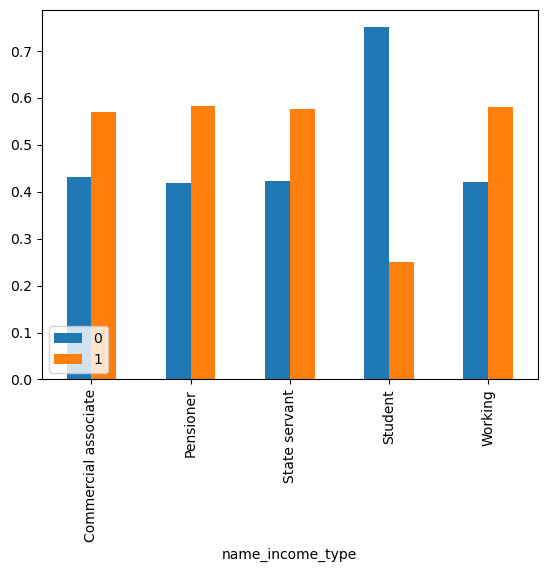

In [39]:
train.groupby('name_income_type')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


# Education
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

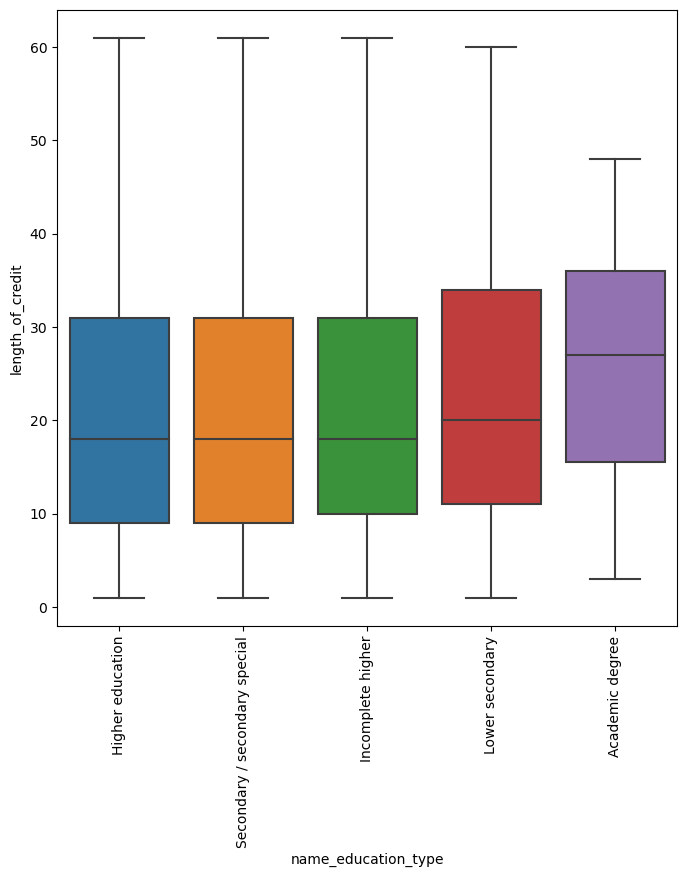

In [40]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_education_type', y='length_of_credit', data=train)
plt.xticks(rotation = 90);

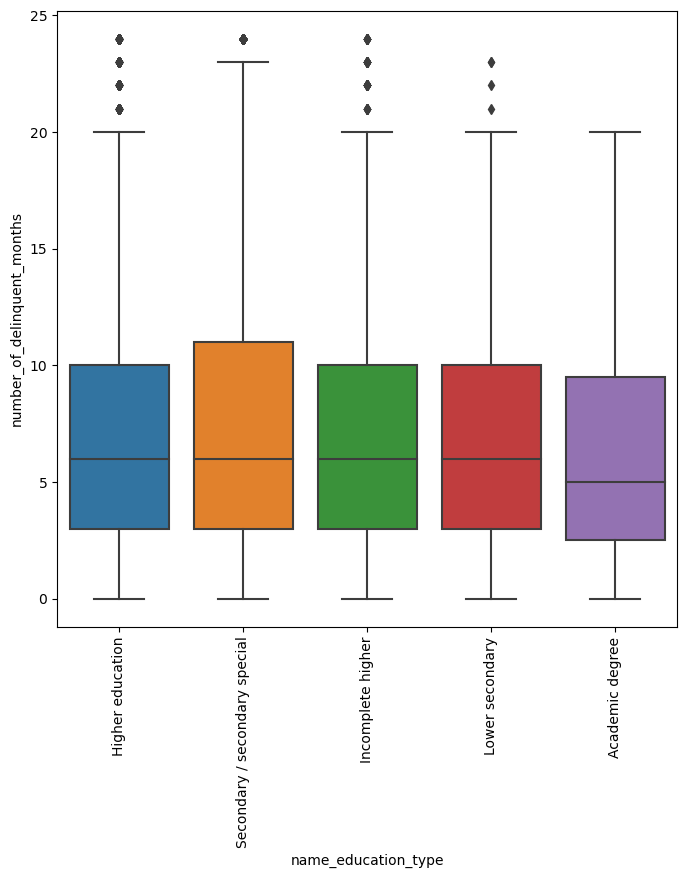

In [41]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_education_type', y='number_of_delinquent_months', data=train[train['number_of_delinquent_months']<25])
plt.xticks(rotation = 90);

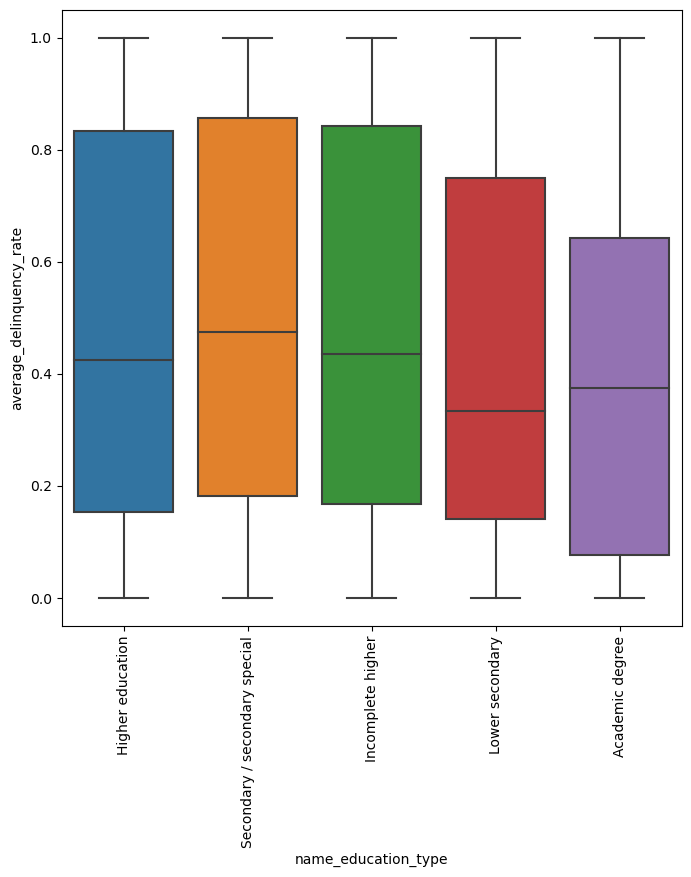

In [42]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_education_type', y='average_delinquency_rate', data=train)
plt.xticks(rotation = 90);

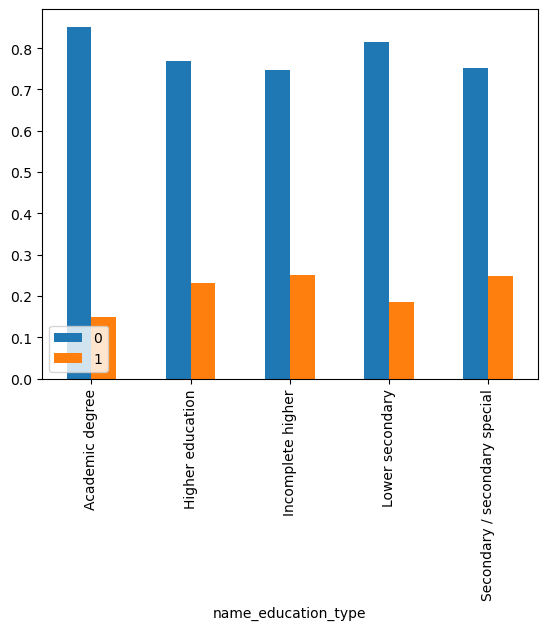

In [43]:
train.groupby('name_education_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


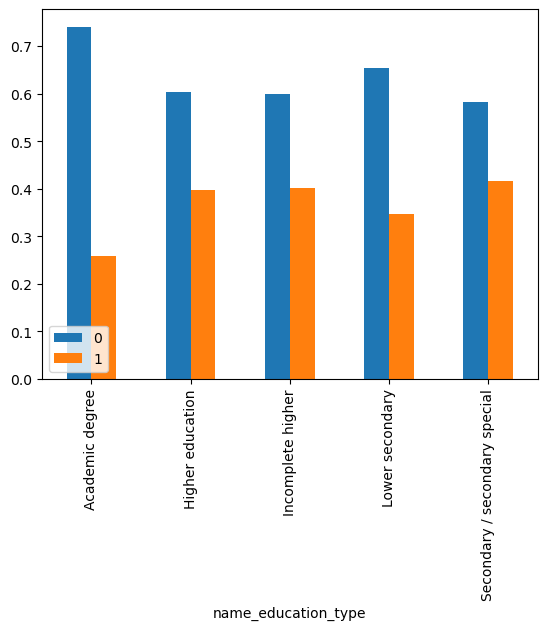

In [44]:
train.groupby('name_education_type')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


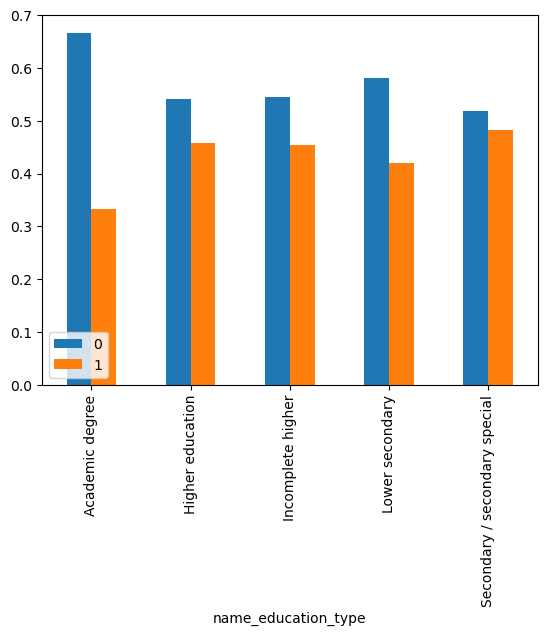

In [45]:
train.groupby('name_education_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


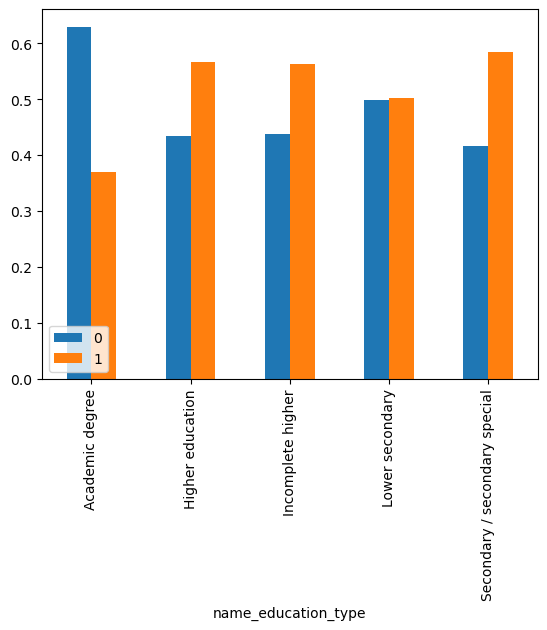

In [46]:
train.groupby('name_education_type')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


In [47]:
# family status and is_delinquent / length of credit / number of delinquent months / average delinquency rate
# / 3 months delinquency / 6months delinquency / 12 months delinquency

In [48]:
'name_family_status'

'is_delinquent', 'length_of_credit',
'number_of_delinquent_months', 'average_delinquency_rate',
'3mo_delinquency', '6mo_delinquency', '12mo_delinquency'

('3mo_delinquency', '6mo_delinquency', '12mo_delinquency')

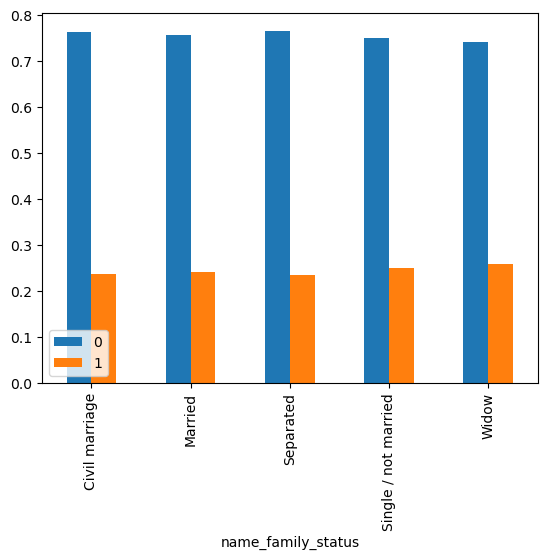

In [49]:
train.groupby('name_family_status')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


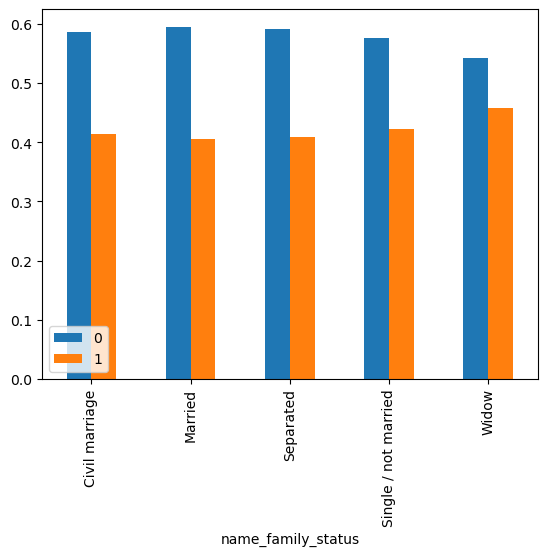

In [50]:
train.groupby('name_family_status')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


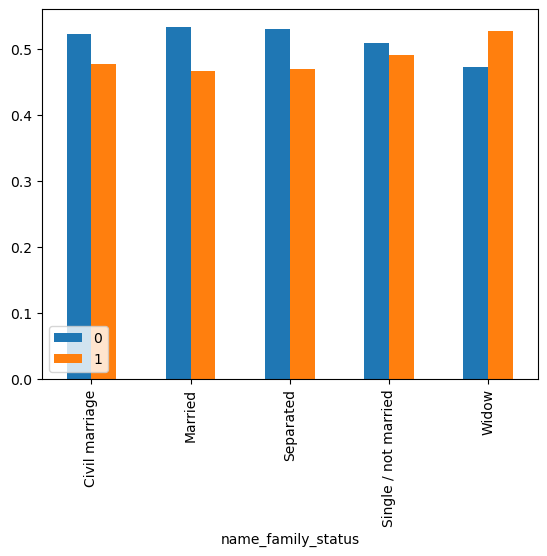

In [51]:
train.groupby('name_family_status')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


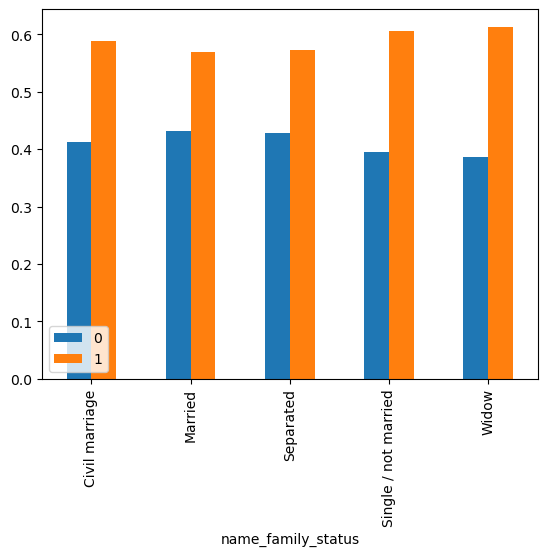

In [52]:
train.groupby('name_family_status')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


# Housing type
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

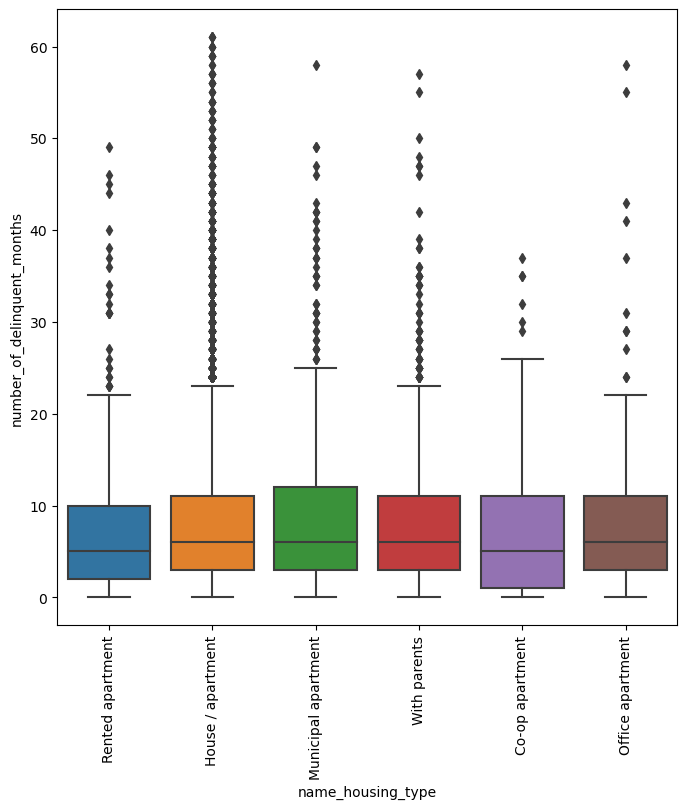

In [94]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_housing_type', y='number_of_delinquent_months', data=train)
plt.xticks(rotation = 90);

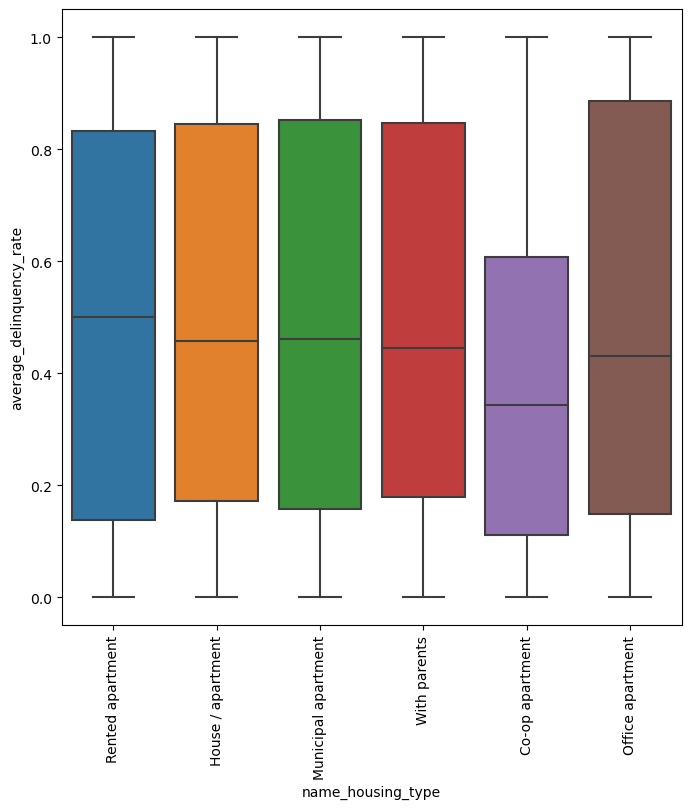

In [95]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_housing_type', y='average_delinquency_rate', data=train)
plt.xticks(rotation = 90);

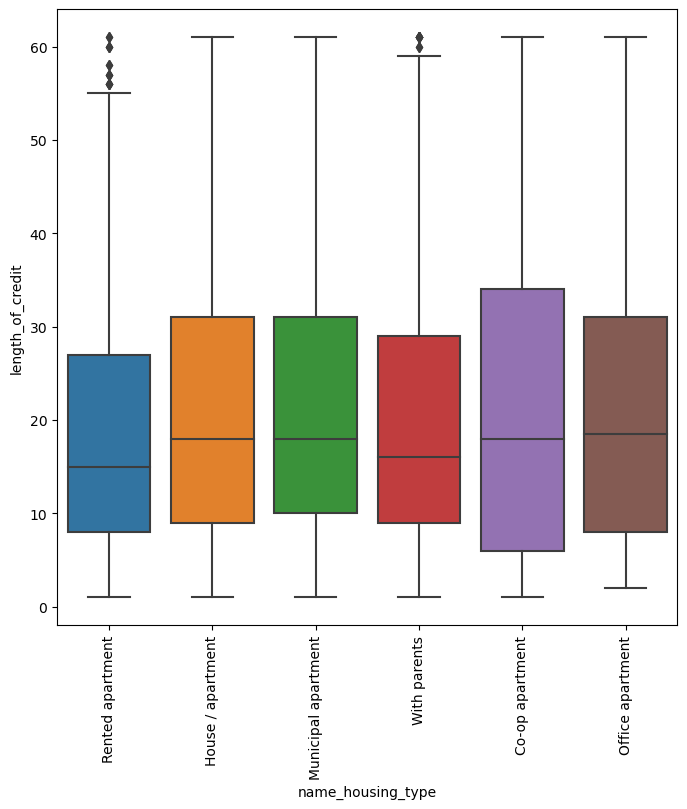

In [96]:
plt.figure(figsize = (8, 8))
sns.boxplot(x='name_housing_type', y='length_of_credit', data=train)
plt.xticks(rotation = 90);

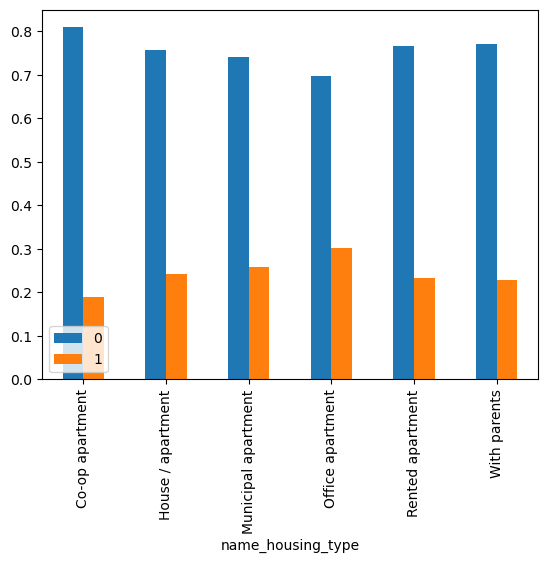

In [91]:
train.groupby('name_housing_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


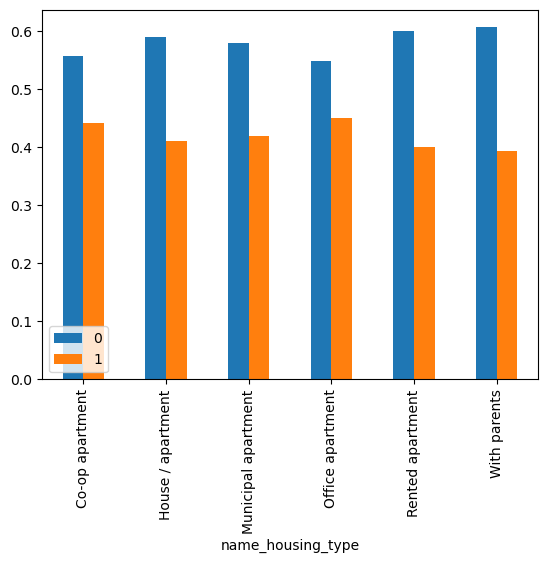

In [92]:
train.groupby('name_housing_type')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


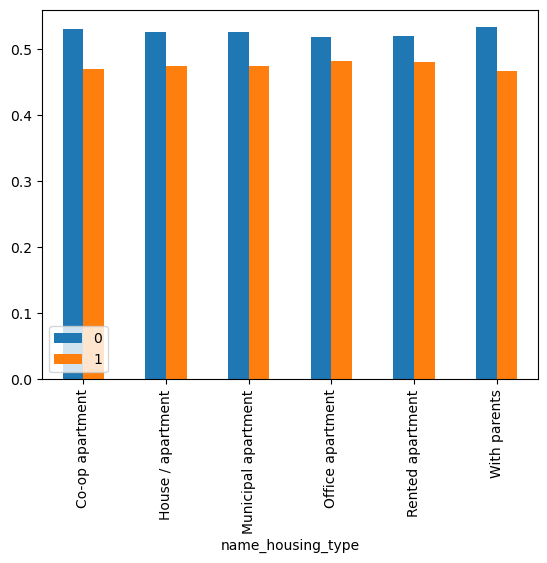

In [93]:
train.groupby('name_housing_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


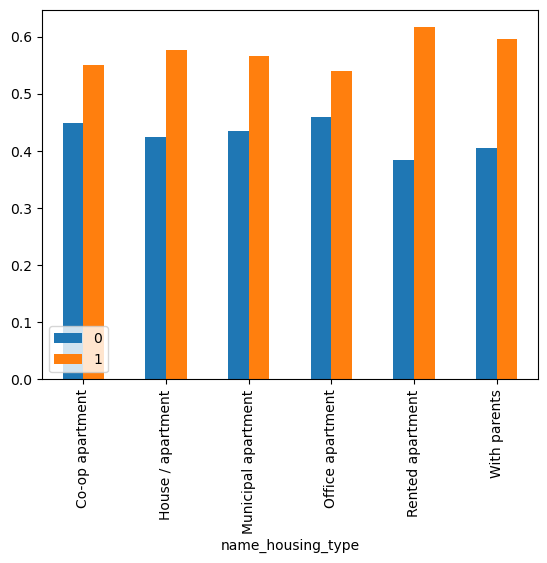

In [94]:
train.groupby('name_housing_type')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


# Days employed > change to years employed
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

In [56]:
'days_employed'

'is_delinquent', 'length_of_credit',
'number_of_delinquent_months', 'average_delinquency_rate',
'3mo_delinquency', '6mo_delinquency', '12mo_delinquency'

('3mo_delinquency', '6mo_delinquency', '12mo_delinquency')

In [57]:
# has mobile and is_delinquent / length of credit / number of delinquent months / average delinquency rate
# / 3 months delinquency / 6months delinquency / 12 months delinquency

In [58]:
'flag_mobil'

'is_delinquent', 'length_of_credit',
'number_of_delinquent_months', 'average_delinquency_rate',
'3mo_delinquency', '6mo_delinquency', '12mo_delinquency'

('3mo_delinquency', '6mo_delinquency', '12mo_delinquency')

In [59]:
# has work phone and is_delinquent / length of credit / number of delinquent months / average delinquency rate
# / 3 months delinquency / 6months delinquency / 12 months delinquency

In [60]:
'flag_work_phone'

'is_delinquent', 'length_of_credit',
'number_of_delinquent_months', 'average_delinquency_rate',
'3mo_delinquency', '6mo_delinquency', '12mo_delinquency'

('3mo_delinquency', '6mo_delinquency', '12mo_delinquency')

In [61]:
# has phone and is_delinquent / length of credit / number of delinquent months / average delinquency rate
# / 3 months delinquency / 6months delinquency / 12 months delinquency

In [62]:
'flag_phone'

'is_delinquent', 'length_of_credit',
'number_of_delinquent_months', 'average_delinquency_rate',
'3mo_delinquency', '6mo_delinquency', '12mo_delinquency'

('3mo_delinquency', '6mo_delinquency', '12mo_delinquency')

In [63]:
# has email and is_delinquent / length of credit / number of delinquent months / average delinquency rate
# / 3 months delinquency / 6months delinquency / 12 months delinquency

In [64]:
'flag_email'

'is_delinquent', 'length_of_credit',
'number_of_delinquent_months', 'average_delinquency_rate',
'3mo_delinquency', '6mo_delinquency', '12mo_delinquency'

('3mo_delinquency', '6mo_delinquency', '12mo_delinquency')

# Occupation type
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br>/ 3 months delinquency / 6months delinquency / 12 months delinquency

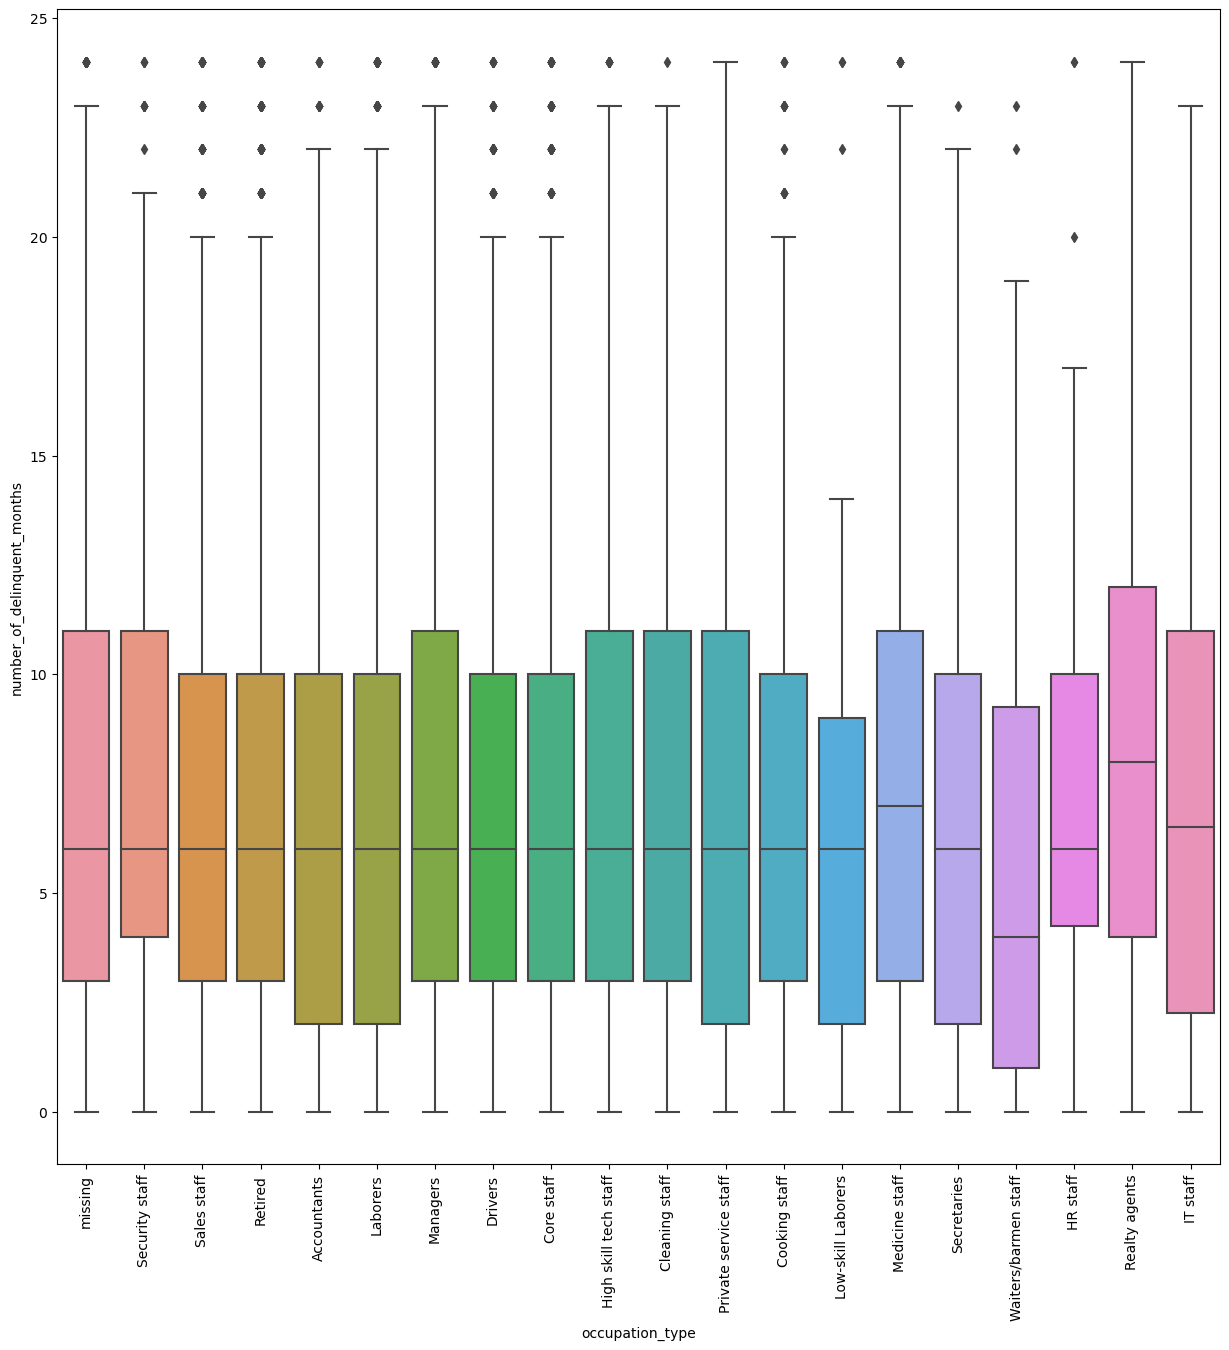

In [66]:
plt.figure(figsize = (15, 15))
sns.boxplot(x='occupation_type', y='number_of_delinquent_months', data=train[train['number_of_delinquent_months']<25])
plt.xticks(rotation = 90);

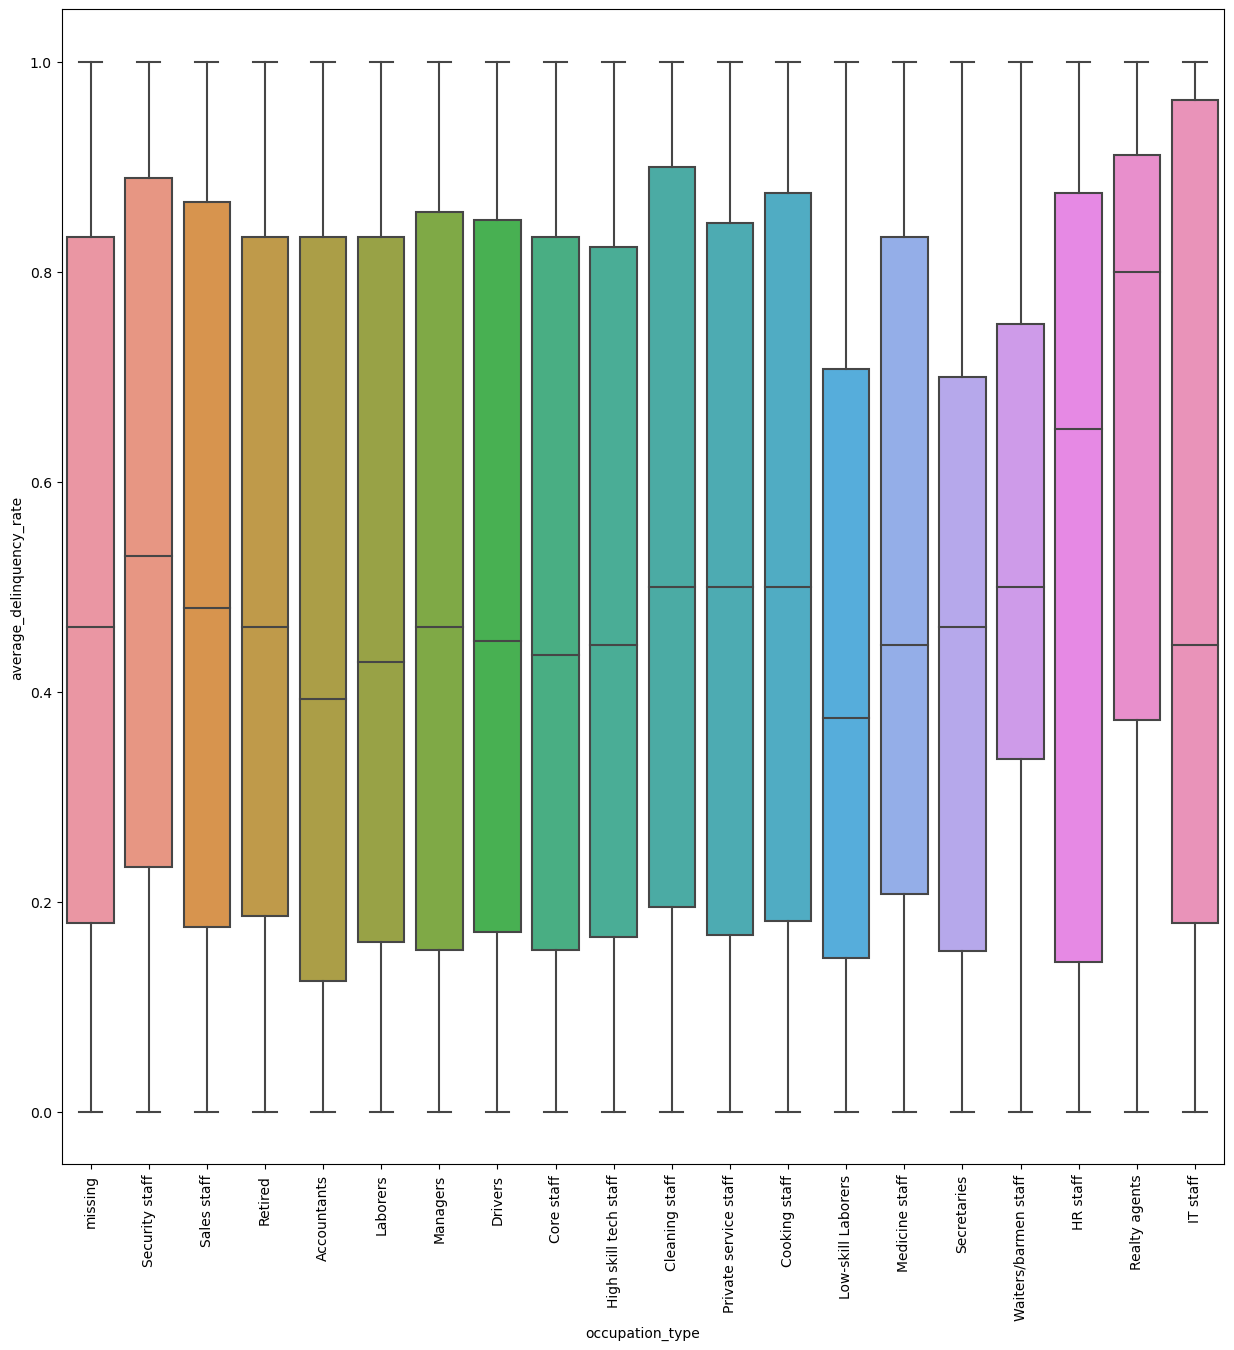

In [67]:
plt.figure(figsize = (15, 15))
sns.boxplot(x='occupation_type', y='average_delinquency_rate', data=train)
plt.xticks(rotation = 90);

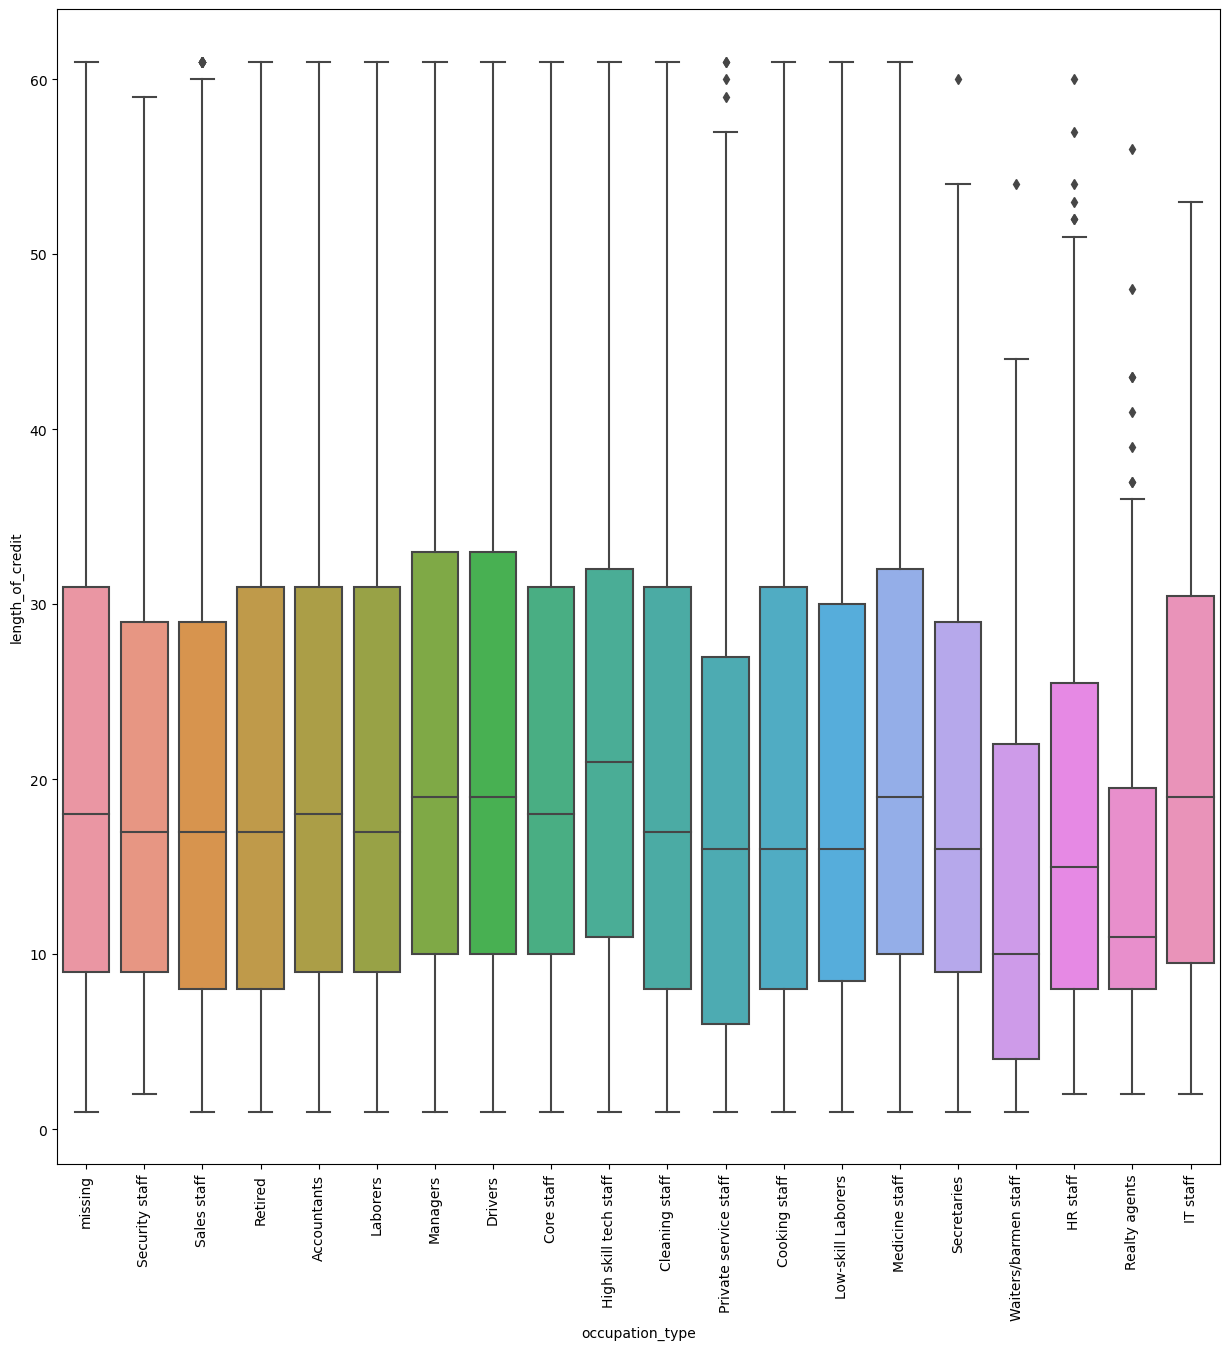

In [68]:
plt.figure(figsize = (15, 15))
sns.boxplot(x='occupation_type', y='length_of_credit', data=train)
plt.xticks(rotation = 90);

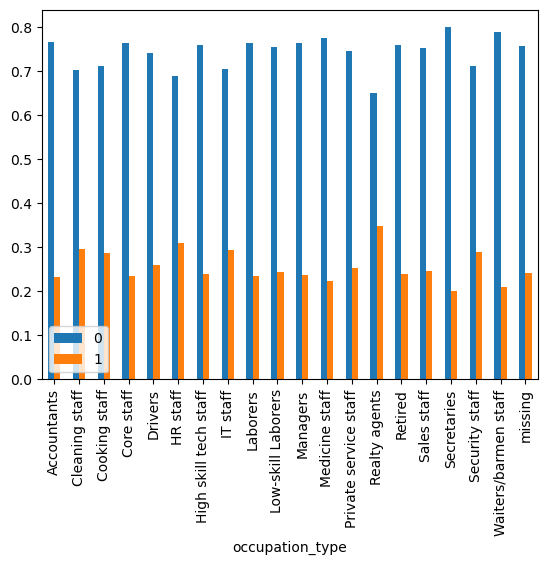

In [69]:
train.groupby('occupation_type')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

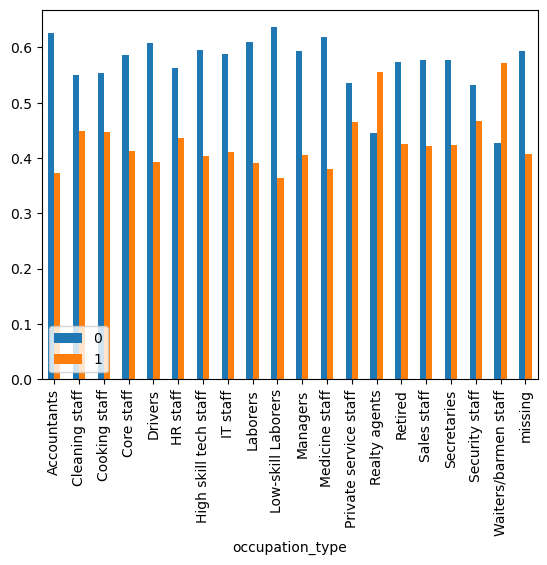

In [70]:
train.groupby('occupation_type')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


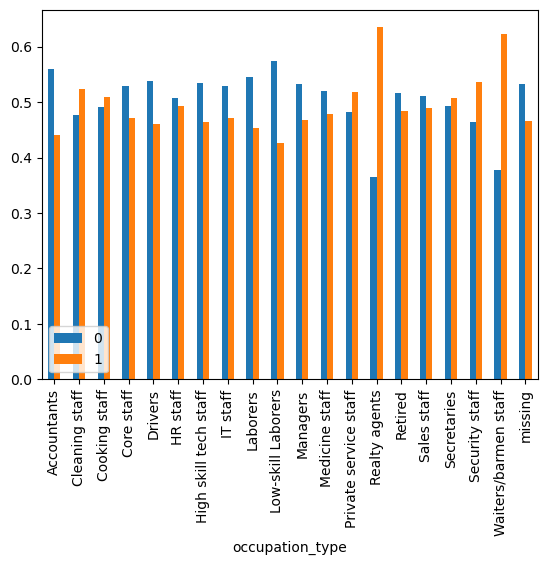

In [71]:
train.groupby('occupation_type')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


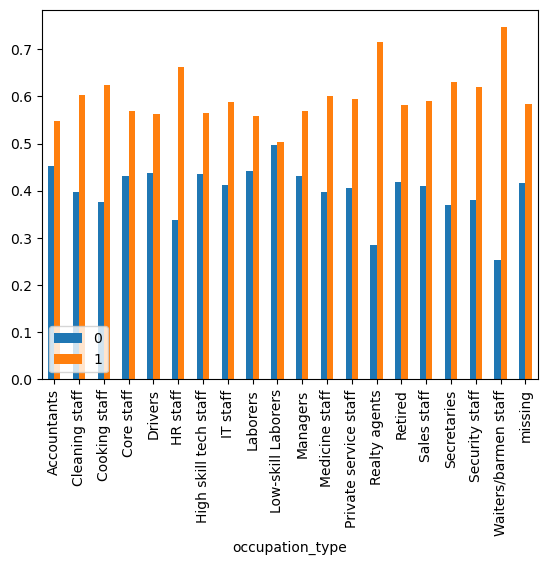

In [72]:
train.groupby('occupation_type')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


# Family members
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

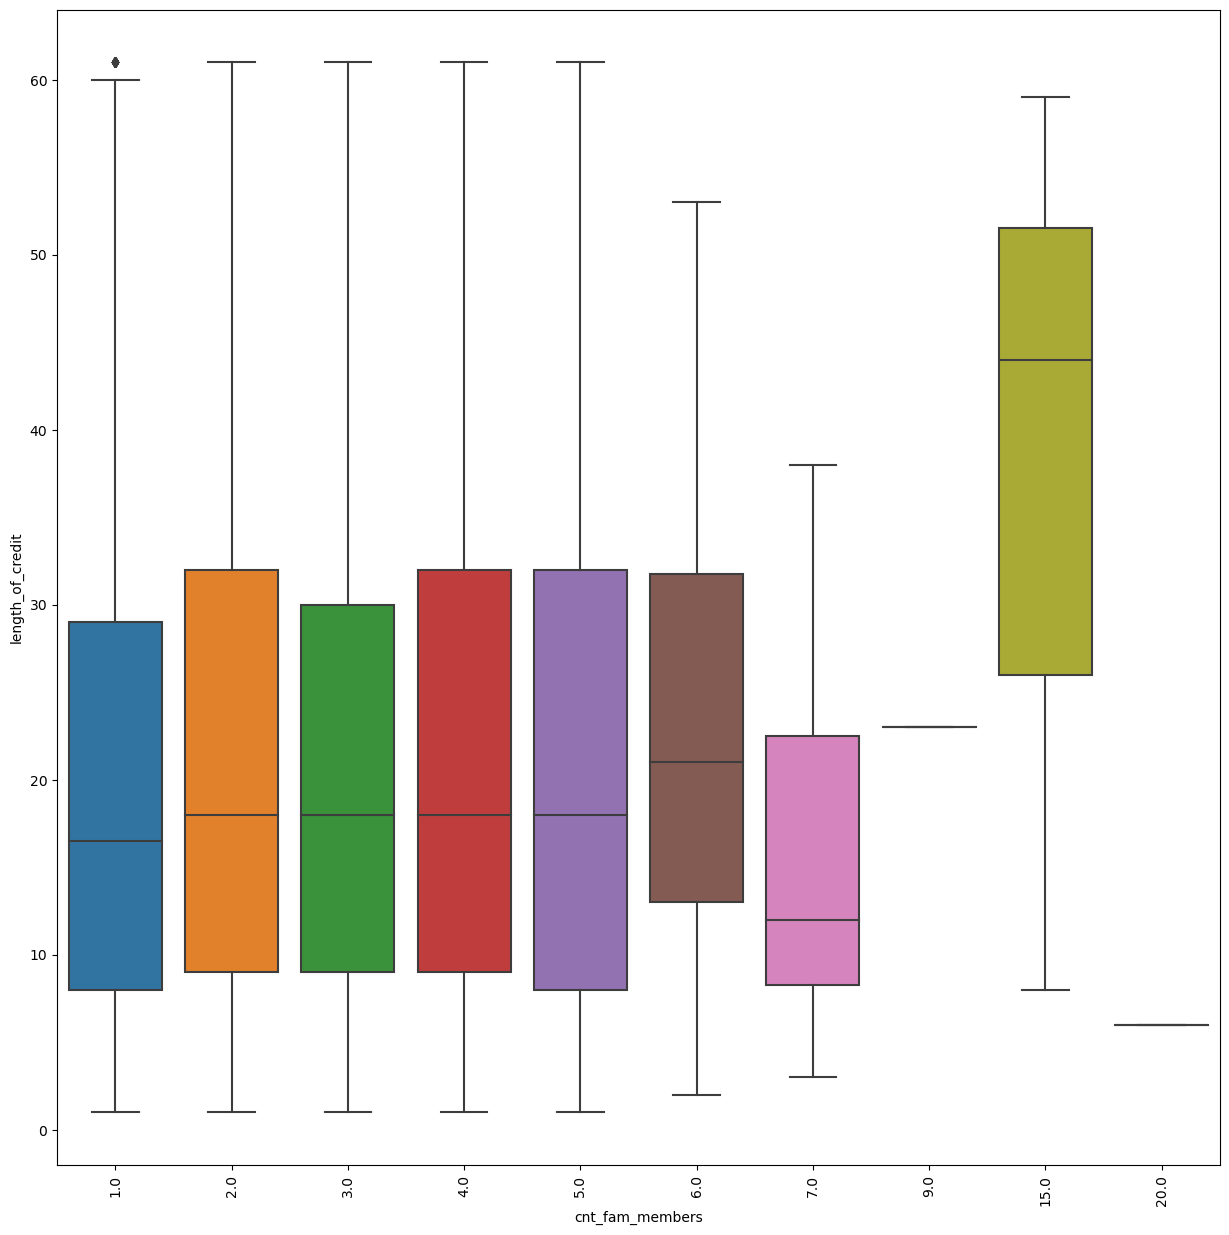

In [97]:
plt.figure(figsize = (15, 15))
sns.boxplot(train, x='cnt_fam_members', y='length_of_credit')
plt.xticks(rotation = 90);

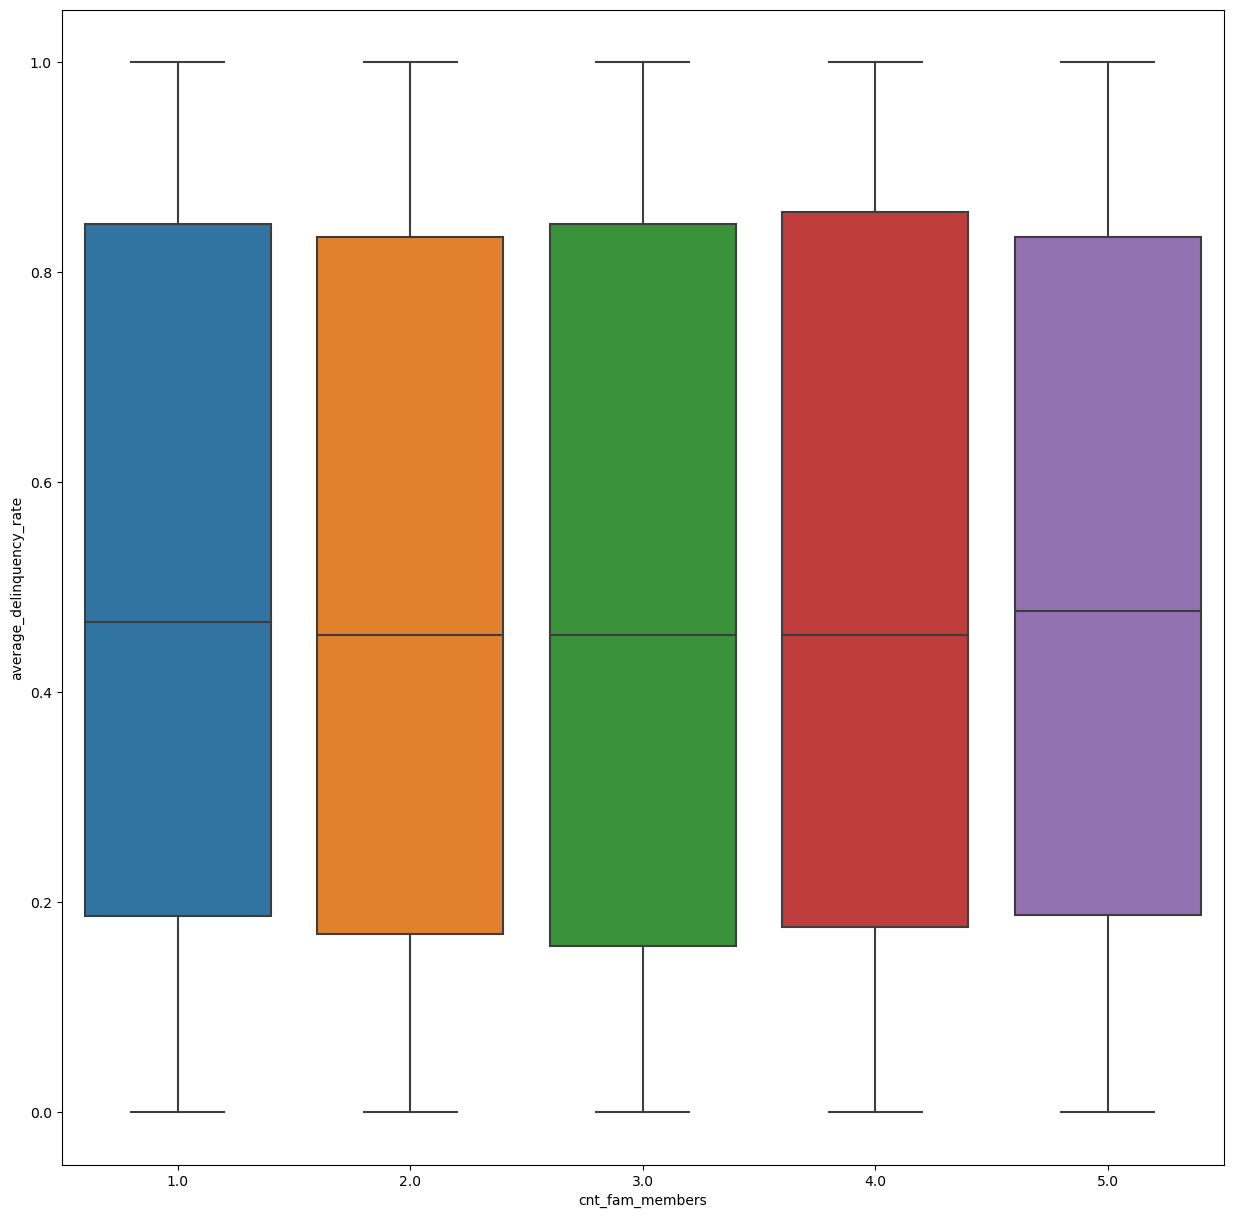

In [99]:
plt.figure(figsize = (15, 15))
sns.boxplot(train[train['cnt_fam_members']<6], x='cnt_fam_members', y='average_delinquency_rate')
plt.xticks(rotation = 0);

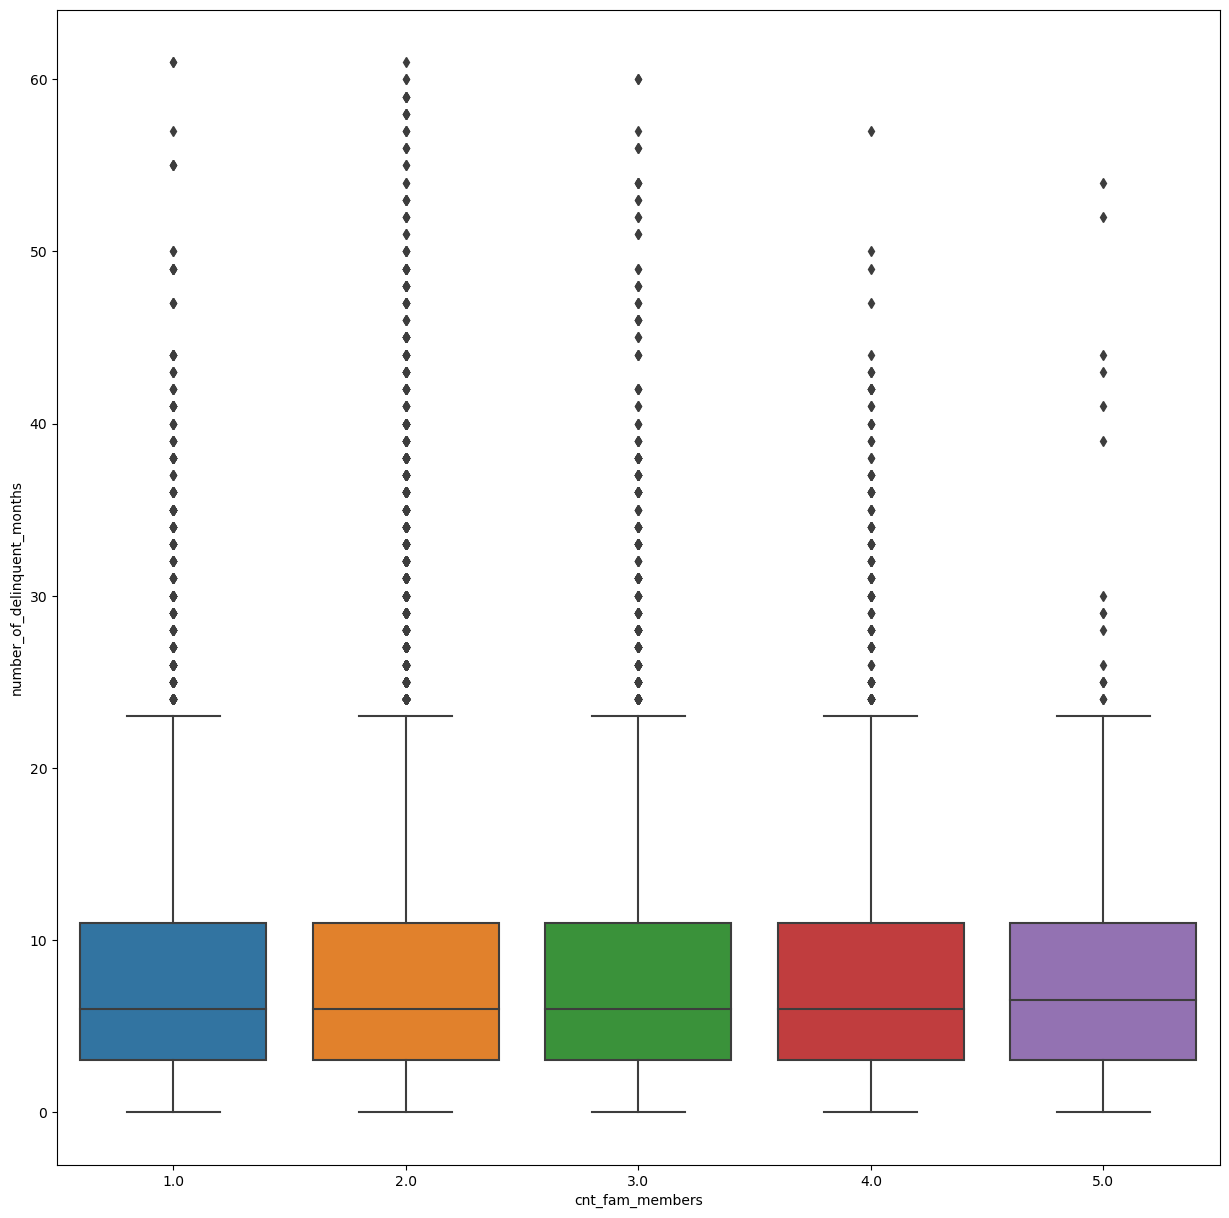

In [100]:
plt.figure(figsize = (15, 15))
sns.boxplot(train[train['cnt_fam_members']<6], x='cnt_fam_members', y='number_of_delinquent_months')
plt.xticks(rotation = 0);

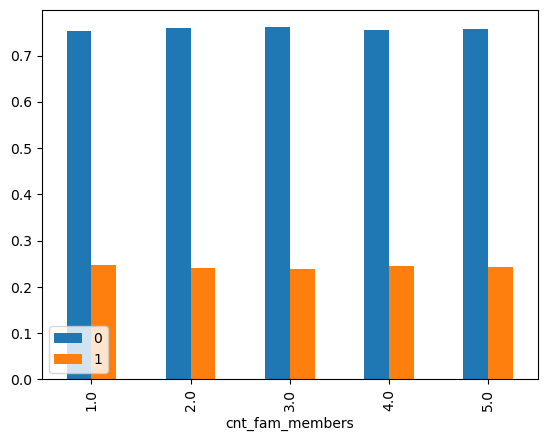

In [101]:
train[train['cnt_fam_members']<6].groupby('cnt_fam_members')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


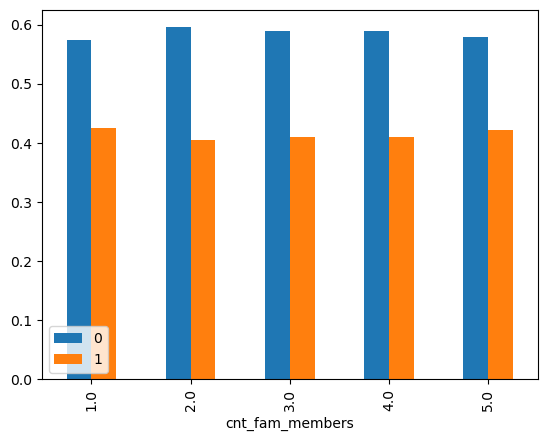

In [102]:
train[train['cnt_fam_members']<6].groupby('cnt_fam_members')['3mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


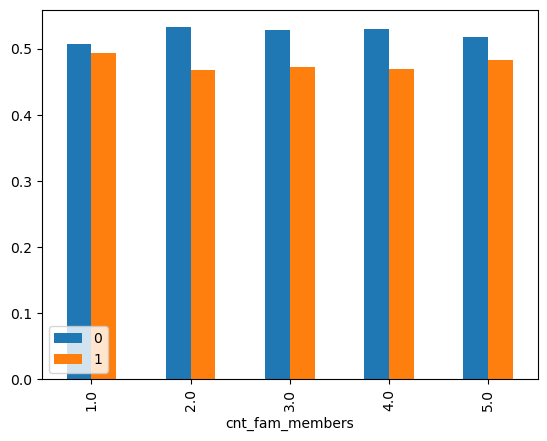

In [104]:
train[train['cnt_fam_members']<6].groupby('cnt_fam_members')['6mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


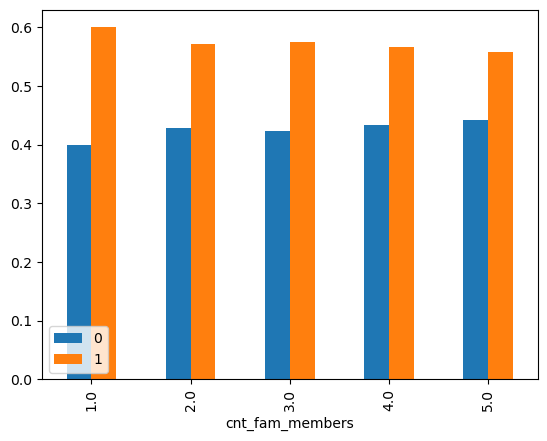

In [105]:
train[train['cnt_fam_members']<6].groupby('cnt_fam_members')['12mo_delinquency'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


# Age
and is_delinquent / length of credit / number of delinquent months / average delinquency rate
<br> / 3 months delinquency / 6months delinquency / 12 months delinquency

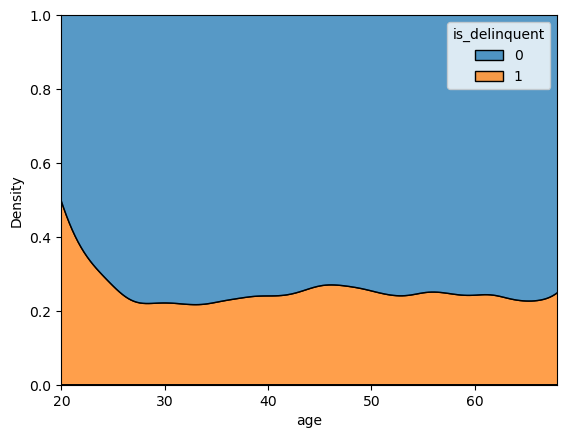

In [116]:
age_min = train['age'].min()
age_max = train['age'].max()


sns.kdeplot(data=train, x="age", hue="is_delinquent", multiple="fill")
plt.xlim(age_min, age_max);

> Between 25 and 65, the majority of people are not currently delinquent

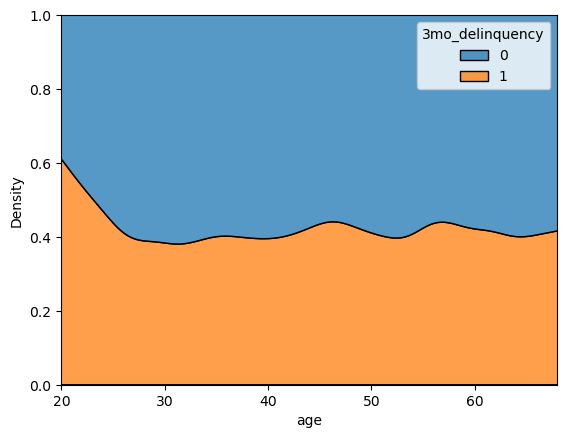

In [117]:
sns.kdeplot(data=train, x="age", hue="3mo_delinquency", multiple="fill")
plt.xlim(age_min, age_max);

> In the last 3 months, the majority of people between 25 and 65 were not delinquent

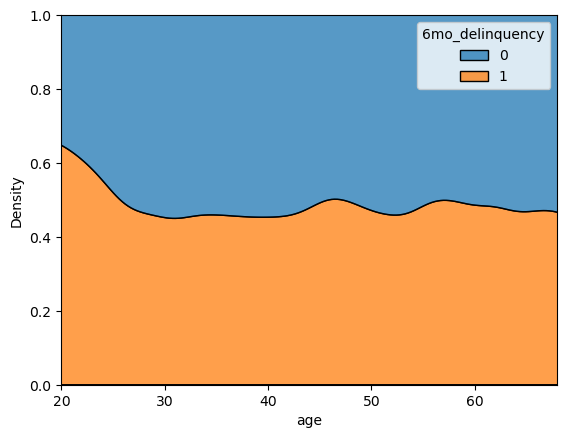

In [118]:
sns.kdeplot(data=train, x="age", hue="6mo_delinquency", multiple="fill")
plt.xlim(age_min, age_max);

> As we go deeper in the past, more people appear to have been delinquent at some point around this time

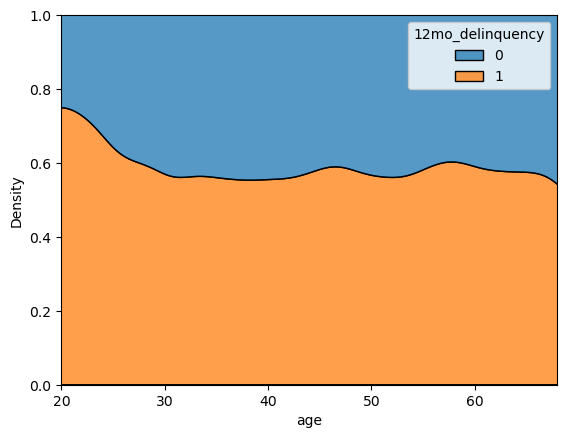

In [119]:
sns.kdeplot(data=train, x="age", hue="12mo_delinquency", multiple="fill")
plt.xlim(age_min, age_max);

> In the last 12 months, most people have been delinquent at some point around this time